<a id = 'Content'><a/>
# Numerical column cleanup
### Contents
- [1.0 Import, functions, data loading](#1.0)
- [2.0 Initial cleanup](#2.0)
- [3.0 Imputing and deleting null values](#3.0)
- [4.0 In-depth analysis of numerical columns](#4.0)
    - [4.1 Batch 1](#4.1)
    - [4.2 Batch 2](#4.2)
    - [4.3 Batch 3](#4.3)
    - [4.4 Batch 4](#4.4)
- [5.0 Final cleanup](#5.0)
- [6.0 Predicted variable](#6.0)
- [7.0 Correlation and final drops](#7.0)

<a id = '1.0'><a/>
### 1.0 Import, functions, data loading
* [Back to top](#Content)

In [1]:
# Import libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

plt.style.use('fivethirtyeight')
sns.set(style = 'white')

In [2]:
def display_all(df):
    '''temporarily increase display max and transpose the dateframe view
    for enhanced readability
    '''
    with pd.option_context("display.max_rows", 100, "display.max_columns", 100): 
        display(df.head(40).transpose())

In [3]:
# displays three key numerical column charts for quick analysis
def num_info(col):
    """function takes a dataframe and its categorical column, and displays two
    horizontal bar chart, aligned by category: value counts chart and mean price 
    per category chart
    """
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))
    fig.suptitle(col, size=20, color='maroon', y=1)
    # box plot to visualize the distribution on the left
    sns.boxplot(data=ames, y=ames[col], ax=ax1)
    ax1.set_title(f'{col} distribution', fontsize=14, color='darkgoldenrod')
    ax1.set_ylabel(f'{col}', fontsize=14, color='darkgoldenrod')
    
    # scatterplot vs saleprice on the right
    sns.regplot(data=ames, x=ames[col], y=ames['saleprice'], ax=ax2, line_kws={"color": "green"})
    trans = ax2.get_xaxis_transform()
    trans2 = ax2.get_yaxis_transform()
    ax2.set_title(f'sale price vs {col}', fontsize=14, color='darkgoldenrod')
    ax2.set_ylabel('sale price', fontsize=14, color='darkgoldenrod')
    ax2.set_xlabel(f'{col}', fontsize=14, color='darkgoldenrod')

    ax2.axvline(x=ames[col].mean(), dash_capstyle='butt', linestyle='-.', color='r', label='hah')
    if col != 'yrsold':
        plt.text(ames[col].mean()*1.02, .96, f'ave {col}', transform=trans, color='darkred')
    else:
        plt.text(ames[col].mean(), .96, f'ave {col}', transform=trans, color='darkred')
        
    ax2.axhline(y=ames['saleprice'].mean(), dash_capstyle='butt', linestyle='-.', color='r')
    plt.text(0.865, ames['saleprice'].mean()*1.02, 'ave price', transform=trans2, color='darkred')
 
    # histogram
    sns.histplot(data=ames, x=ames[col], ax=ax3)
    ax3.set_xlabel(f'{col}', fontsize=14, color='darkgoldenrod')
    ax3.set_title(f'{col} histogram', fontsize=14, color='darkgoldenrod')

In [4]:
ames = pd.read_csv('../datasets/train_cat_clean.csv')
ames2 = pd.read_csv('../datasets/test_cat_clean.csv')

<a id = '2.0'><a/>
### 1.0 Initial Cleanup
* [Back to top](#Content)

In [5]:
display_all(ames)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
id,1.090000e+02,5.440000e+02,1.530000e+02,318.0,2.550000e+02,1.380000e+02,2.827000e+03,1.450000e+02,1.942000e+03,1.956000e+03,1.044000e+03,2.752000e+03,8.070000e+02,1177.0,1.480000e+03,3.240000e+02,1.311000e+03,770.0,2.063000e+03,6.900000e+01,2.062000e+03,3.510000e+02,2.393000e+03,1.200000e+01,2.339000e+03,6.240000e+02,8.600000e+01,1.534000e+03,2.243000e+03,1957.0,3.800000e+02,2860.0,2.517000e+03,1933.0,8.200000e+02,6.750000e+02,2.910000e+03,2.100000e+01,1.873000e+03,2.125000e+03
pid,5.333522e+08,5.313790e+08,5.353042e+08,916386060.0,9.064250e+08,5.351260e+08,9.081861e+08,5.351540e+08,5.353531e+08,5.354261e+08,5.274513e+08,9.063802e+08,9.062261e+08,533236070.0,9.074180e+08,9.232021e+08,9.023011e+08,905101490.0,9.051071e+08,5.284581e+08,9.051062e+08,5.271310e+08,5.281420e+08,5.271652e+08,5.272500e+08,5.351041e+08,5.323762e+08,9.092770e+08,9.111031e+08,535450190.0,5.273552e+08,909276010.0,5.332501e+08,535302070.0,9.063401e+08,5.354262e+08,9.232252e+08,5.273581e+08,5.341772e+08,9.071350e+08
mssubclass,6.000000e+01,6.000000e+01,2.000000e+01,60.0,5.000000e+01,2.000000e+01,1.800000e+02,2.000000e+01,2.000000e+01,6.000000e+01,1.600000e+02,2.000000e+01,7.000000e+01,160.0,2.000000e+01,2.000000e+01,7.000000e+01,20.0,2.000000e+01,6.000000e+01,2.000000e+01,1.200000e+02,6.000000e+01,2.000000e+01,1.900000e+02,2.000000e+01,2.000000e+01,5.000000e+01,1.900000e+02,50.0,2.000000e+01,70.0,1.200000e+02,20.0,2.000000e+01,2.000000e+01,1.600000e+02,2.000000e+01,2.000000e+01,2.000000e+01
lotfrontage,NaN,4.300000e+01,6.800000e+01,73.0,8.200000e+01,1.370000e+02,3.500000e+01,NaN,NaN,7.000000e+01,2.100000e+01,6.400000e+01,1.200000e+02,24.0,7.400000e+01,9.300000e+01,3.400000e+01,80.0,7.100000e+01,7.200000e+01,1.090000e+02,4.000000e+01,1.030000e+02,NaN,1.000000e+02,9.200000e+01,6.500000e+01,NaN,7.500000e+01,60.0,8.000000e+01,NaN,3.000000e+01,60.0,7.900000e+01,8.000000e+01,4.100000e+01,1.050000e+02,8.000000e+01,6.000000e+01
lotarea,1.351700e+04,1.149200e+04,7.922000e+03,9802.0,1.423500e+04,1.649200e+04,3.675000e+03,1.216000e+04,1.578300e+04,1.160600e+04,1.680000e+03,7.488000e+03,2.640000e+04,2645.0,9.627000e+03,1.011400e+04,4.571000e+03,8816.0,8.197000e+03,8.640000e+03,8.724000e+03,5.664000e+03,1.286700e+04,7.980000e+03,3.465000e+04,1.057300e+04,8.450000e+03,1.170000e+04,8.250000e+03,8064.0,9.600000e+03,11435.0,9.549000e+03,10950.0,1.063700e+04,9.000000e+03,2.665000e+03,1.175100e+04,9.600000e+03,8.428000e+03
neighborhood,1.000000e+00,3.000000e+00,1.000000e+00,3.0,3.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,3.0,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.000000e+00,3.000000e+00,1.000000e+00,3.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,1.0,2.000000e+00,2.0,3.000000e+00,1.0,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00
overallqual,6.000000e+00,7.000000e+00,5.000000e+00,5.0,6.000000e+00,6.000000e+00,6.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00,7.000000e+00,5.000000e+00,8.0,7.000000e+00,5.000000e+00,5.000000e+00,5.0,6.000000e+00,7.000000e+00,5.000000e+00,8.000000e+00,8.000000e+00,6.000000e+00,5.000000e+00,6.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.0,8.000000e+00,8.0,8.000000e+00,6.0,8.000000e+00,6.000000e+00,5.000000e+00,6.000000e+00,7.000000e+00,5.000000e+00
overallcond,8.000000e+00,5.000000e+00,7.000000e+00,5.0,8.000000e+00,6.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,7.000000e+00,5.0,5.000000e+00,5.000000e+00,5.000000e+00,6.0,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,7.000000e+00,5.000000e+00,6.000000e+00,8.000000e+00,6.000000e+00,6.000000e+00,7.0,5.000000e+00,7.0,5.000000e+00,6.0,5.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,7.000000e+00
yearbuilt,1.976000e+03,1.996000e+03

In [6]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050 entries, 0 to 2049
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2050 non-null   int64  
 1   pid            2050 non-null   int64  
 2   mssubclass     2050 non-null   int64  
 3   lotfrontage    1720 non-null   float64
 4   lotarea        2050 non-null   int64  
 5   neighborhood   2050 non-null   int64  
 6   overallqual    2050 non-null   int64  
 7   overallcond    2050 non-null   int64  
 8   yearbuilt      2050 non-null   int64  
 9   yearremod/add  2050 non-null   int64  
 10  masvnrarea     2028 non-null   float64
 11  bsmtfinsf1     2049 non-null   float64
 12  bsmtfinsf2     2049 non-null   float64
 13  bsmtunfsf      2049 non-null   float64
 14  totalbsmtsf    2049 non-null   float64
 15  1stflrsf       2050 non-null   int64  
 16  2ndflrsf       2050 non-null   int64  
 17  lowqualfinsf   2050 non-null   int64  
 18  grlivare

In [7]:
# 56 categorical columns are cleaned up, the next will be the numeric ones. 
# since categorical ones were changed into numeric ones in the previous notebook,
# we can't tell which one was originally which. Copy & paste the list of numeric columns
# from the previous notebook.('fireplaces' and 'garagecars' numeric columns were already
# combined with categorical, so take them out)

num_col = ['id', 'pid', 'mssubclass', 'lotfrontage', 'lotarea', 'overallqual', 'overallcond', 'yearbuilt', 
            'yearremod/add', 'masvnrarea', 'bsmtfinsf1', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', '1stflrsf', 
            '2ndflrsf','lowqualfinsf','grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath', 
            'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd', 'garageyrblt', 'garagearea',
            'wooddecksf', 'openporchsf', 'enclosedporch', '3ssnporch', 'screenporch', 'poolarea', 'miscval',
            'mosold', 'yrsold', 'saleprice']

In [8]:
display_all(ames[num_col])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
id,109.0,544.0,153.0,318.0,255.0,138.0,2827.0,145.0,1942.0,1956.0,1044.0,2752.0,807.0,1177.0,1480.0,324.0,1311.0,770.0,2063.0,69.0,2062.0,351.0,2393.0,12.0,2339.0,624.0,86.0,1534.0,2243.0,1957.0,380.0,2860.0,2517.0,1933.0,820.0,675.0,2910.0,21.0,1873.0,2125.0
pid,533352170.0,531379050.0,535304180.0,916386060.0,906425045.0,535126040.0,908186070.0,535154050.0,535353130.0,535426130.0,527451290.0,906380150.0,906226060.0,533236070.0,907418040.0,923202105.0,902301140.0,905101490.0,905107140.0,528458070.0,905106150.0,527131030.0,528142010.0,527165230.0,527250040.0,535104120.0,532376160.0,909277040.0,911103060.0,535450190.0,527355150.0,909276010.0,533250130.0,535302070.0,906340110.0,535426150.0,923225240.0,527358140.0,534177210.0,907135050.0
mssubclass,60.0,60.0,20.0,60.0,50.0,20.0,180.0,20.0,20.0,60.0,160.0,20.0,70.0,160.0,20.0,20.0,70.0,20.0,20.0,60.0,20.0,120.0,60.0,20.0,190.0,20.0,20.0,50.0,190.0,50.0,20.0,70.0,120.0,20.0,20.0,20.0,160.0,20.0,20.0,20.0
lotfrontage,NaN,43.0,68.0,73.0,82.0,137.0,35.0,NaN,NaN,70.0,21.0,64.0,120.0,24.0,74.0,93.0,34.0,80.0,71.0,72.0,109.0,40.0,103.0,NaN,100.0,92.0,65.0,NaN,75.0,60.0,80.0,NaN,30.0,60.0,79.0,80.0,41.0,105.0,80.0,60.0
lotarea,13517.0,11492.0,7922.0,9802.0,14235.0,16492.0,3675.0,12160.0,15783.0,11606.0,1680.0,7488.0,26400.0,2645.0,9627.0,10114.0,4571.0,8816.0,8197.0,8640.0,8724.0,5664.0,12867.0,7980.0,34650.0,10573.0,8450.0,11700.0,8250.0,8064.0,9600.0,11435.0,9549.0,10950.0,10637.0,9000.0,2665.0,11751.0,9600.0,8428.0
overallqual,6.0,7.0,5.0,5.0,6.0,6.0,6.0,5.0,5.0,5.0,6.0,7.0,5.0,8.0,7.0,5.0,5.0,5.0,6.0,7.0,5.0,8.0,8.0,6.0,5.0,6.0,5.0,5.0,5.0,5.0,8.0,8.0,8.0,6.0,8.0,6.0,5.0,6.0,7.0,5.0
overallcond,8.0,5.0,7.0,5.0,8.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,7.0,5.0,5.0,5.0,5.0,6.0,5.0,5.0,5.0,5.0,5.0,7.0,5.0,6.0,8.0,6.0,6.0,7.0,5.0,7.0,5.0,6.0,5.0,6.0,6.0,6.0,6.0,7.0
yearbuilt,1976.0,1996.0,1953.0,2006.0,1900.0,1966.0,2005.0,1959.0,1952.0,1969.0,1971.0,2005.0,1880.0,1999.0,2007.0,2004.0,1916.0,1963.0,1977.0,2009.0,1968.0,2000.0,2005.0,1992.0,1955.0,1961.0,1965.0,1937.0,1895.0,1949.0,1981.0,1929.0,1995.0,1952.0,2007.0,1958.0,1977.0,1977.0,1973.0,1994.0
yearremod/add,2005.0,1997.0,2007.0,2007.0,1993.0,2002.0,2006.0,1959.0,1952.0,1969.0,1971.0,2005.0,2007.0,2000.0,2007.0,2005.0,1950.0,1963.0,1977.0,2009.0,1968.0,2000.0,2006.0,2007.0,1955.0,1961.0,2009.0,1995.0,2006.0,2006.0,1981.0,1950.0,1996.0,1952.0,2008.0,1958.0,1977.0,1977.0,1973.0,1994.0
masvnrarea,289.0,132.0,0.0,0.0,0.0,0.0,82.0,180.0,0.0,192.0,232.0,0.0,0.0,456.0,0.0,0.0,0.0,0.0,148.0,0.0,0.0,0.0,NaN,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,336.0,82.0,0.0,480.0,320.0,0.0


<a id = '3.0'><a/>
### 3.0 Imputing and deleting null values
* [Back to top](#Content)

In [9]:
ames.isnull().sum()

id                 0
pid                0
mssubclass         0
lotfrontage      330
lotarea            0
neighborhood       0
overallqual        0
overallcond        0
yearbuilt          0
yearremod/add      0
masvnrarea        22
bsmtfinsf1         1
bsmtfinsf2         1
bsmtunfsf          1
totalbsmtsf        1
1stflrsf           0
2ndflrsf           0
lowqualfinsf       0
grlivarea          0
bsmtfullbath       2
bsmthalfbath       2
fullbath           0
halfbath           0
bedroomabvgr       0
kitchenabvgr       0
kitchenqual        0
totrmsabvgrd       0
garageyrblt      113
garagearea         0
paveddrive         0
wooddecksf         0
openporchsf        0
enclosedporch      0
3ssnporch          0
screenporch        0
poolarea           0
miscval            0
mosold             0
yrsold             0
saleprice          0
zone_FV            0
zone_RL            0
zone_RM            0
lotshape_irr       0
near_busy_st       0
non_1fam           0
2plus_fl           0
hip_roof     

In [10]:
ames2.isnull().sum()

id                 0
pid                0
mssubclass         0
lotfrontage      160
lotarea            0
neighborhood       0
overallqual        0
overallcond        0
yearbuilt          0
yearremod/add      0
masvnrarea         1
bsmtfinsf1         0
bsmtfinsf2         0
bsmtunfsf          0
totalbsmtsf        0
1stflrsf           0
2ndflrsf           0
lowqualfinsf       0
grlivarea          0
bsmtfullbath       0
bsmthalfbath       0
fullbath           0
halfbath           0
bedroomabvgr       0
kitchenabvgr       0
kitchenqual        0
totrmsabvgrd       0
garageyrblt       45
garagearea         0
paveddrive         0
wooddecksf         0
openporchsf        0
enclosedporch      0
3ssnporch          0
screenporch        0
poolarea           0
miscval            0
mosold             0
yrsold             0
zone_FV            0
zone_RL            0
zone_RM            0
lotshape_irr       0
near_busy_st       0
non_1fam           0
2plus_fl           0
hip_roof           0
ext_ord      

In [11]:
#run display_all
display_all(ames[ames['bsmtfinsf1'].isnull()])

,1327
id,1.342000e+03
pid,9.032301e+08
mssubclass,2.000000e+01
lotfrontage,9.900000e+01
lotarea,5.940000e+03
neighborhood,1.000000e+00
overallqual,4.000000e+00
overallcond,7.000000e+00
yearbuilt,1.946000e+03
yearremod/add,1.950000e+03


In [12]:
# there is one row row with 4 nan values for basement columns. drop it
ames.drop(1327, inplace=True)

In [13]:
display_all(ames[ames['bsmtfullbath'].isnull()])

,616
id,1.498000e+03
pid,9.081541e+08
mssubclass,2.000000e+01
lotfrontage,1.230000e+02
lotarea,4.700700e+04
neighborhood,3.000000e+00
overallqual,5.000000e+00
overallcond,7.000000e+00
yearbuilt,1.959000e+03
yearremod/add,1.996000e+03


In [14]:
#again, bath nan values are in one row. drop it.
ames.drop(616, inplace=True)

In [15]:
#drop the one nan from garagearea. one is not worth investigating.
ames.drop(ames[ames['garagearea'].isnull()].index, inplace=True)

In [16]:
# there are 22 nan values in veneer area column. we'll probably end up dropping the column, 
#becuase we already have veneer categorical variable, which is sufficient,
#so there is no need to deal with nan values here
ames.masvnrarea.value_counts()

0.0       1213
120.0       11
200.0       10
176.0       10
72.0         9
          ... 
224.0        1
738.0        1
1095.0       1
479.0        1
436.0        1
Name: masvnrarea, Length: 373, dtype: int64

In [17]:
ames['garageyrblt'].describe()

count    1935.000000
mean     1978.734884
std        25.439416
min      1895.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2207.000000
Name: garageyrblt, dtype: float64

In [18]:
ames['garageyrblt'].sort_values(ascending=False).head()

1699    2207.0
1241    2010.0
144     2010.0
625     2009.0
19      2009.0
Name: garageyrblt, dtype: float64

In [19]:
# garageyrblt has many nan values, and one wrong value (year 2207), but as the garage 
#is almost always built in the same year as the house, we'll drop the column and spare
# ourselves the trouble of imputing nan values
ames.drop(columns=['garageyrblt', 'masvnrarea'], inplace=True)
ames2.drop(columns=['garageyrblt', 'masvnrarea'], inplace=True)


#### lot frontage seems like an important column and needs to have its nan values imputed.

In [20]:
ames['sqrt_lotarea'] = np.sqrt(ames['lotarea'])
ames2['sqrt_lotarea'] = np.sqrt(ames2['lotarea'])

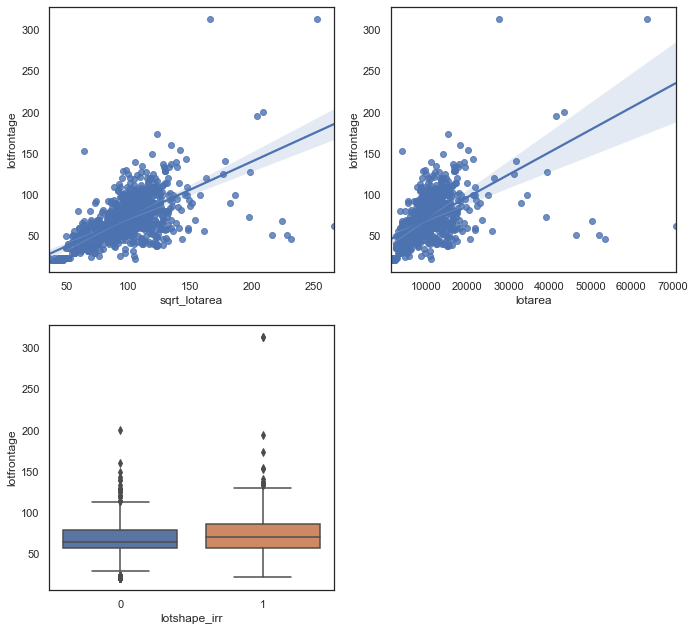

In [21]:
# plot a few chart of frontage vs other lot features it might be related with
fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot(221)
sns.regplot(x='sqrt_lotarea',y='lotfrontage',data=ames, ax=ax1)
ax2 = plt.subplot(222)
sns.regplot(x='lotarea',y='lotfrontage',data=ames, ax=ax2)
ax3 = plt.subplot(223)
sns.boxplot(data=ames, y='lotfrontage', x='lotshape_irr')
plt.show()

####  on the charts above, the lot frontagr is correlated with sq root of lotarea and less strongly to lotshape. (actually, further analysis not shown here has shown that in a multiple regression scenario, irregular lotshape is negatively correleted with lotfrontage, which would make intuitive sense.)


In [22]:
print('corr of lotarea to frontage is', round(ames['lotarea'].corr(
    ames['lotfrontage']),3))
print('corr of lotshape_irr to frontage is', round(ames['lotshape_irr'].corr(
    ames['lotfrontage']),3))

corr of lotarea to frontage is 0.575
corr of lotshape_irr to frontage is 0.135


#### next: impute the missing lotfrontage values

In [23]:
# the only missing values are in 'lotfrontage' now. create new dataframe without 
# any missing values.
# reset index so we can iterate easily (a few rows were dropped)
ames.reset_index(inplace=True, drop=True)

ames_imp = ames.dropna()

ames_imp.head()

,id,pid,mssubclass,lotfrontage,lotarea,neighborhood,overallqual,overallcond,yearbuilt,yearremod/add,...,hip_roof,ext_ord,has_veneer,cncrt_found,bsmt_ord,heatingqc_dum,cent_air_dum,garage_ord,fireplace_ord,sqrt_lotarea
1,544,531379050,60,43.0,11492,3,7,5,1996,1997,...,0,2,1,1,3.00,1,1,1.67,1.00,107.200746
2,153,535304180,20,68.0,7922,1,5,7,1953,2007,...,0,2,0,0,2.75,0,1,0.67,0.00,89.005618
3,318,916386060,60,73.0,9802,3,5,5,2006,2007,...,0,2,0,1,2.00,0,1,2.00,0.00,99.005050
4,255,906425045,50,82.0,14235,3,6,8,1900,1993,...,0,0,0,1,1.75,0,1,1.00,0.00,119.310519
5,138,535126040,20,137.0,16492,1,6,6,1966,2002,...,0,1,0,0,2.50,1,1,1.67,1.25,128.421182


In [24]:
# set the independent and dependend variable and run the regression
X = ames_imp[['sqrt_lotarea', 'lotshape_irr']]
y = ames_imp['lotfrontage']
lr = LinearRegression().fit(X, y)

In [25]:
# get indeces of the nulls
null_idx = ames[ames['lotfrontage'].isnull()].index
null_idx2 = ames2[ames2['lotfrontage'].isnull()].index

In [26]:
#  use list comprehension to replace nulls with regression predictions
ames['lotfrontage_imp'] = [ames.loc[i,'lotfrontage'] if i not in null_idx
                           else lr.predict(pd.DataFrame(ames.loc[i,['sqrt_lotarea',
                          'lotshape_irr']]).T)[0] for i in range(len(ames.lotfrontage))]

ames2['lotfrontage_imp'] = [ames2.loc[i,'lotfrontage'] if i not in null_idx2
                           else lr.predict(pd.DataFrame(ames2.loc[i,['sqrt_lotarea',
                          'lotshape_irr']]).T)[0] for i in range(len(ames2.lotfrontage))]

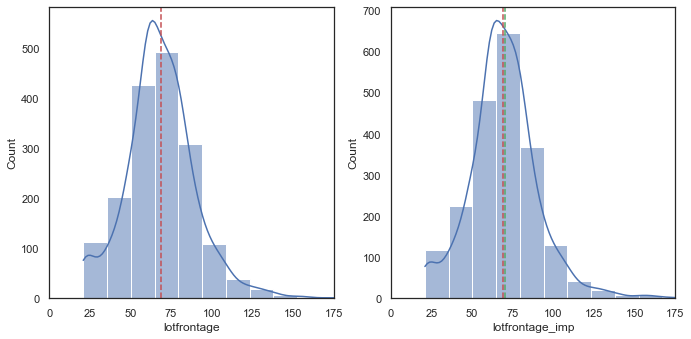

In [27]:
# the old lotfrontage column
fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(10,5))
sns.histplot(ames['lotfrontage'], bins=20, kde=True, ax=ax1)
ax1.set_xlim(0,175)
ax1.axvline(ames['lotfrontage'].mean(), color='r', linestyle='--')

#the new one
sns.histplot(ames['lotfrontage_imp'], bins=20, kde=True, ax=ax2)
ax2.set_xlim(0,175)
ax2.axvline(ames['lotfrontage'].mean(), color='r', linestyle='--')
ax2.axvline(ames['lotfrontage_imp'].mean(), color='g', linestyle='--')
plt.show()

In [28]:
# the shapes look very similar, and the means can barely be seen apart
ames.drop(['lotfrontage', 'sqrt_lotarea'], axis=1, inplace=True)
ames2.drop(['lotfrontage', 'sqrt_lotarea'], axis=1, inplace=True)
print('Train nulls left: ', ames.isnull().sum().sum())
print('Test nulls left: ', ames2.isnull().sum().sum())

Train nulls left:  0
Test nulls left:  0


<a id = '4.0'><a/>
### 4.0 In-depth analysis of numerical columns
* [Back to top](#Content)

In [29]:
# drop extra index columns 'id' and 'pid'
ames.drop(columns=['id', 'pid'], inplace=True)

#keep 'id' for the test set, as it'll be needed for the submission
ames2.drop(columns=['pid'], inplace=True)

In [30]:
num_col.remove('lotfrontage')
num_col.remove('garageyrblt')
num_col.remove('masvnrarea')
num_col.remove('id')
num_col.remove('pid')

In [31]:
display_all(ames[num_col])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
mssubclass,60.0,60.0,20.0,60.0,50.0,20.0,180.0,20.0,20.0,60.0,160.0,20.0,70.0,160.0,20.0,20.0,70.0,20.0,20.0,60.0,20.0,120.0,60.0,20.0,190.0,20.0,20.0,50.0,190.0,50.0,20.0,70.0,120.0,20.0,20.0,20.0,160.0,20.0,20.0,20.0
lotarea,13517.0,11492.0,7922.0,9802.0,14235.0,16492.0,3675.0,12160.0,15783.0,11606.0,1680.0,7488.0,26400.0,2645.0,9627.0,10114.0,4571.0,8816.0,8197.0,8640.0,8724.0,5664.0,12867.0,7980.0,34650.0,10573.0,8450.0,11700.0,8250.0,8064.0,9600.0,11435.0,9549.0,10950.0,10637.0,9000.0,2665.0,11751.0,9600.0,8428.0
overallqual,6.0,7.0,5.0,5.0,6.0,6.0,6.0,5.0,5.0,5.0,6.0,7.0,5.0,8.0,7.0,5.0,5.0,5.0,6.0,7.0,5.0,8.0,8.0,6.0,5.0,6.0,5.0,5.0,5.0,5.0,8.0,8.0,8.0,6.0,8.0,6.0,5.0,6.0,7.0,5.0
overallcond,8.0,5.0,7.0,5.0,8.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,7.0,5.0,5.0,5.0,5.0,6.0,5.0,5.0,5.0,5.0,5.0,7.0,5.0,6.0,8.0,6.0,6.0,7.0,5.0,7.0,5.0,6.0,5.0,6.0,6.0,6.0,6.0,7.0
yearbuilt,1976.0,1996.0,1953.0,2006.0,1900.0,1966.0,2005.0,1959.0,1952.0,1969.0,1971.0,2005.0,1880.0,1999.0,2007.0,2004.0,1916.0,1963.0,1977.0,2009.0,1968.0,2000.0,2005.0,1992.0,1955.0,1961.0,1965.0,1937.0,1895.0,1949.0,1981.0,1929.0,1995.0,1952.0,2007.0,1958.0,1977.0,1977.0,1973.0,1994.0
yearremod/add,2005.0,1997.0,2007.0,2007.0,1993.0,2002.0,2006.0,1959.0,1952.0,1969.0,1971.0,2005.0,2007.0,2000.0,2007.0,2005.0,1950.0,1963.0,1977.0,2009.0,1968.0,2000.0,2006.0,2007.0,1955.0,1961.0,2009.0,1995.0,2006.0,2006.0,1981.0,1950.0,1996.0,1952.0,2008.0,1958.0,1977.0,1977.0,1973.0,1994.0
bsmtfinsf1,533.0,637.0,731.0,0.0,0.0,247.0,547.0,1000.0,292.0,650.0,387.0,393.0,0.0,813.0,24.0,0.0,0.0,651.0,0.0,24.0,492.0,1158.0,0.0,935.0,1056.0,1312.0,553.0,606.0,0.0,0.0,1104.0,0.0,437.0,441.0,1288.0,0.0,548.0,705.0,916.0,420.0
bsmtfinsf2,0.0,0.0,0.0,0.0,0.0,713.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,1057.0,0.0,0.0,0.0,173.0,0.0,0.0,0.0
bsmtunfsf,192.0,276.0,326.0,384.0,676.0,557.0,0.0,188.0,632.0,390.0,96.0,815.0,0.0,147.0,1327.0,1430.0,624.0,470.0,660.0,732.0,402.0,343.0,1209.0,233.0,0.0,141.0,224.0,336.0,957.0,672.0,1420.0,792.0,0.0,507.0,417.0,160.0,36.0,1139.0,326.0,570.0
totalbsmtsf,725.0,913.0,1057.0,384.0,676.0,1517.0,547.0,1188.0,924.0,1040.0,483.0,1208.0,0.0,960.0,1351.0,1430.0,624.0,1121.0,660.0,756.0,894.0,1501.0,1209.0,1168.0,1056.0,1453.0,894.0,942.0,957.0,672.0,2524.0,792.0,1494.0,948.0,1705.0,160.0,757.0,1844.0,1242.0,990.0


<a id = '4.1'><a/>
### 4.1 Batch 1
* [Back to top](#Content)

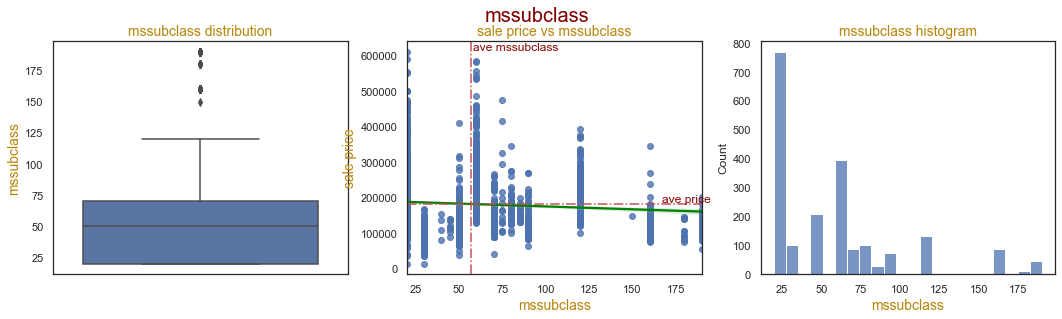

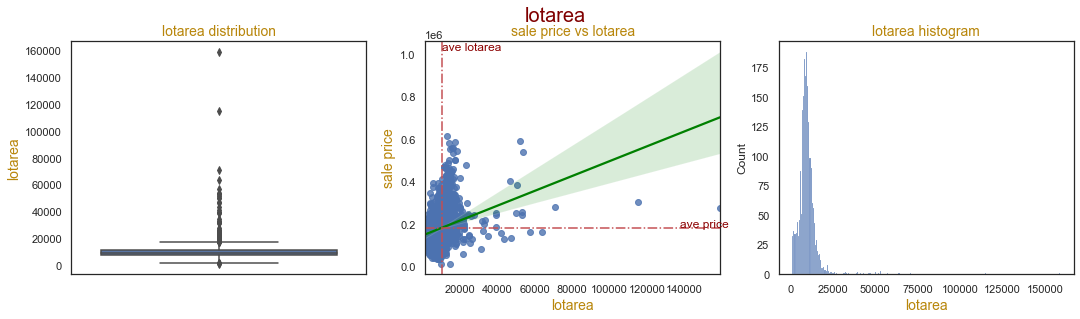

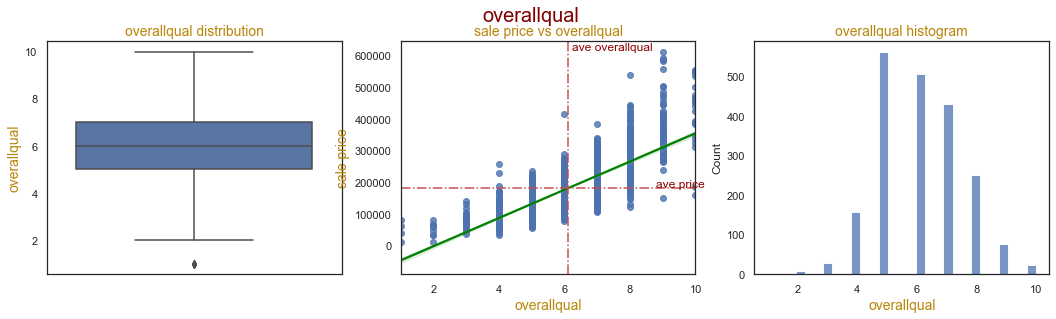

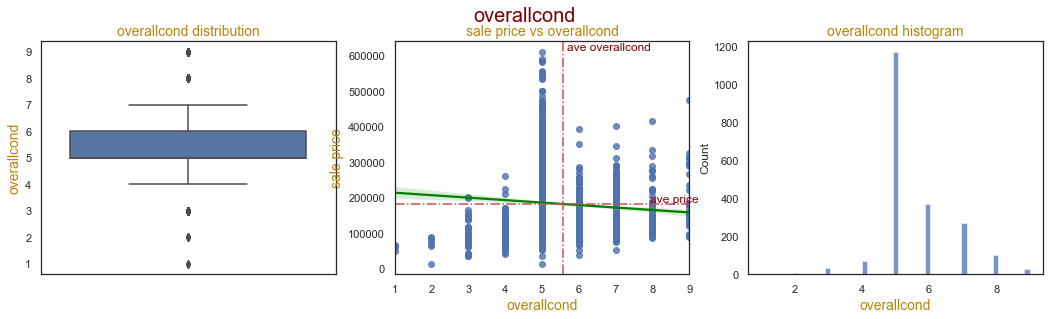

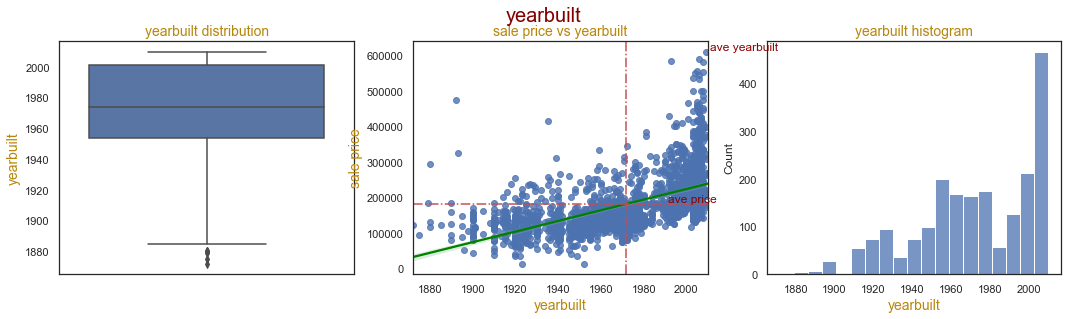

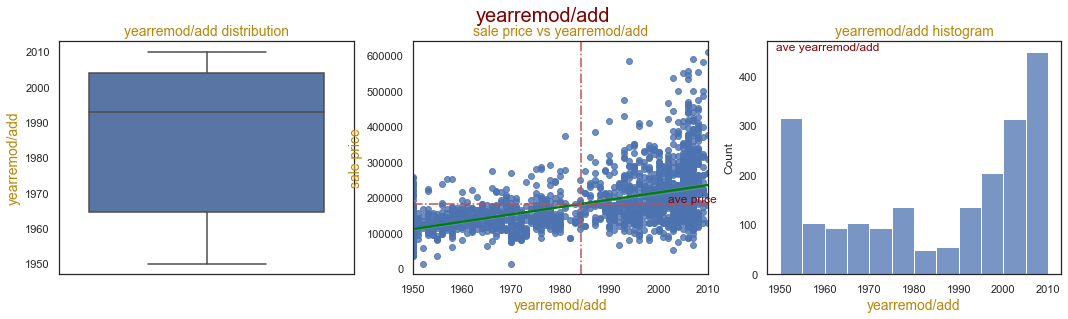

In [32]:
for col in num_col[0:6]:
    num_info(col)

### **Conclusions (1-6):**
- **mssubclass:** check how similar this column is to housesyle, already formatted. if very similar, drop
- **lotarea:** very important. analyze thoroughly. keep.
- **overallqual:** categorical column, already in numeric form, with impact on price. keep.
- **overallcond:** Interestingly, we originally dropped this column as it appeared to have no impact on saleprice. Later on we noticed that it helps boost our r2 and rmse scores. it probably holds some predictive power that is not apparent from the 3 charts above. keep.
- **yearbuilt:** decide if to keep this one or 'yearremod/add'. whichever, turn it into ago by substracting it from 2011
- **yearremod/add:** see yearbuilt

In [33]:
ames_check = pd.read_csv('../datasets/train.csv')

In [34]:
ames_check[['MS SubClass', 'House Style']]

,MS SubClass,House Style
0,60,2Story
1,60,2Story
2,20,1Story
3,60,2Story
4,50,1.5Fin
...,...,...
2046,20,1Story
2047,30,1Story
2048,50,1.5Fin
2049,20,1Story


#### mssubclass column is virtually identical to the housestyle column we had in  the previous notebook. one column is the coded version of the other basically. drop mssublcass. (drops will be done at the end)


In [35]:
del ames_check

In [36]:
# lot area should be a very important column. let's check it out
ames['lotarea'].describe()

count      2048.000000
mean      10049.675293
std        6697.167566
min        1300.000000
25%        7500.000000
50%        9432.000000
75%       11512.750000
max      159000.000000
Name: lotarea, dtype: float64

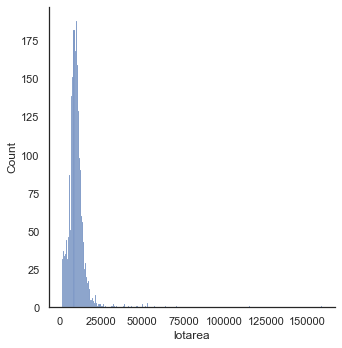

In [37]:
sns.displot(ames['lotarea'])

In [38]:
#drop lot area with more than 60000sf
# we can't drop from the test set, as each row is needed for prediction submission
ames.drop(ames.loc[ames['lotarea'] > 60000].index, inplace=True)


In [39]:
ames.shape

(2044, 52)

array([[<AxesSubplot:title={'center':'lotarea'}>]], dtype=object)

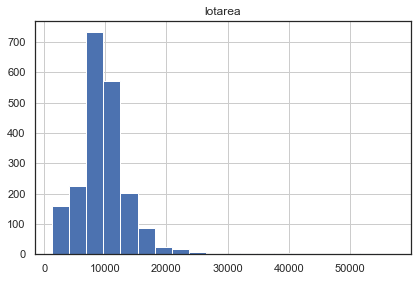

In [40]:
ames.hist(column='lotarea', bins = 20)

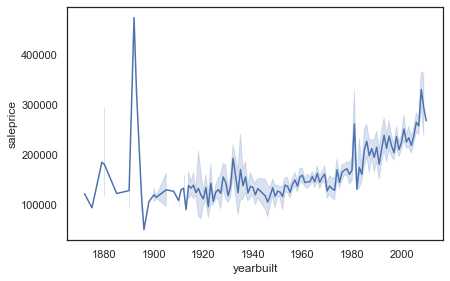

In [41]:
sns.lineplot(data=ames, x='yearbuilt', y='saleprice')
plt.show()

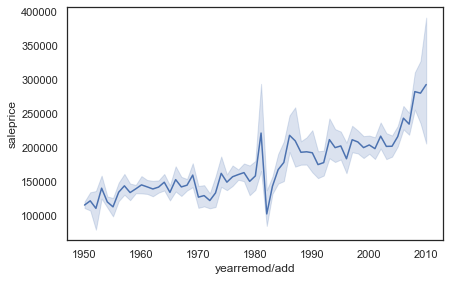

In [42]:
sns.lineplot(data=ames, x='yearremod/add', y='saleprice')
plt.show()

In [43]:
max(ames['yearremod/add'])

2010

In [44]:
# year built and year remodelled features look equally predicteve. keep remodel year and drop
# year built as it is less smooth. substract remodel year from 2011 to get the time elapsed 
# (the last datapoint is 2010)
ames['remodel_age'] = [2011]*len(ames['yearremod/add']) - ames['yearremod/add']
ames2['remodel_age'] = [2011]*len(ames2['yearremod/add']) - ames2['yearremod/add']

<a id = '4.2'><a/>
### 4.2 Batch 2
* [Back to top](#Content)

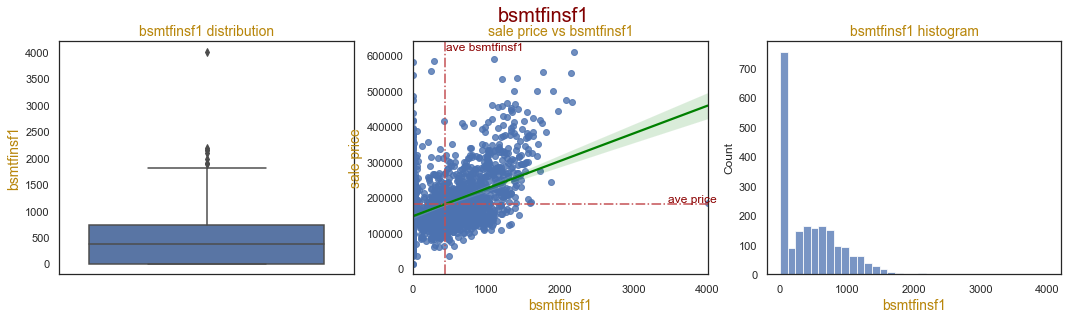

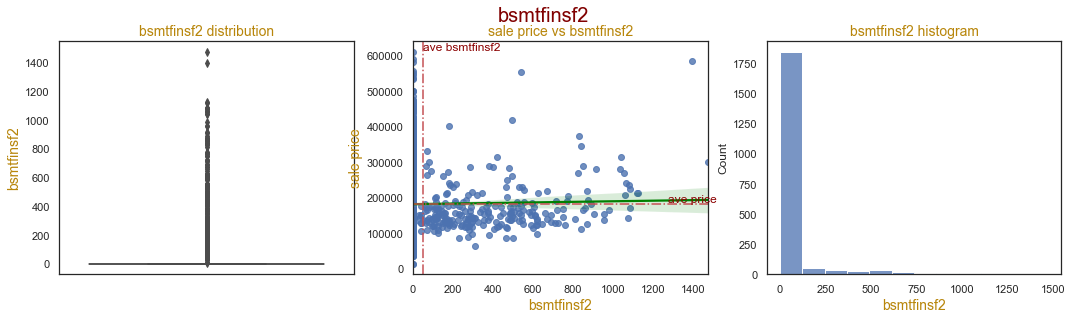

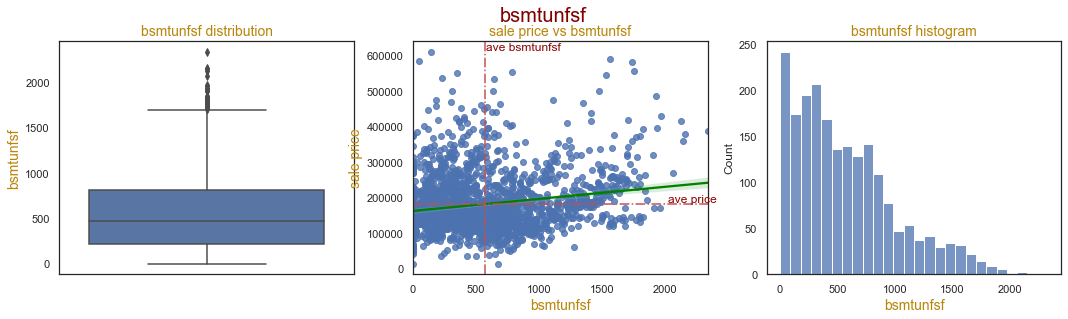

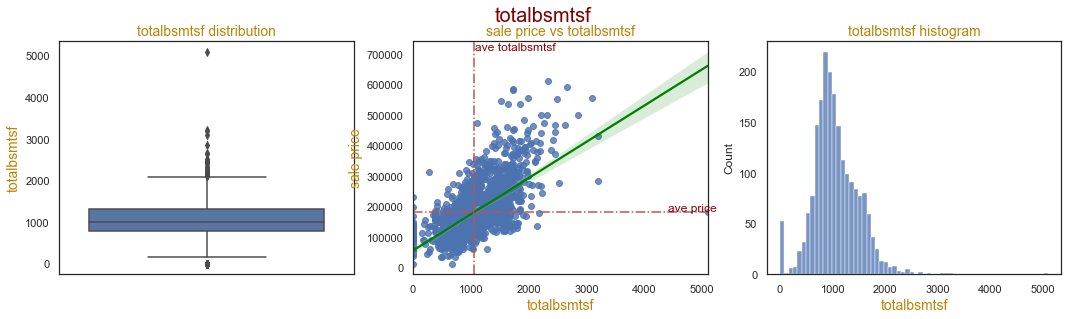

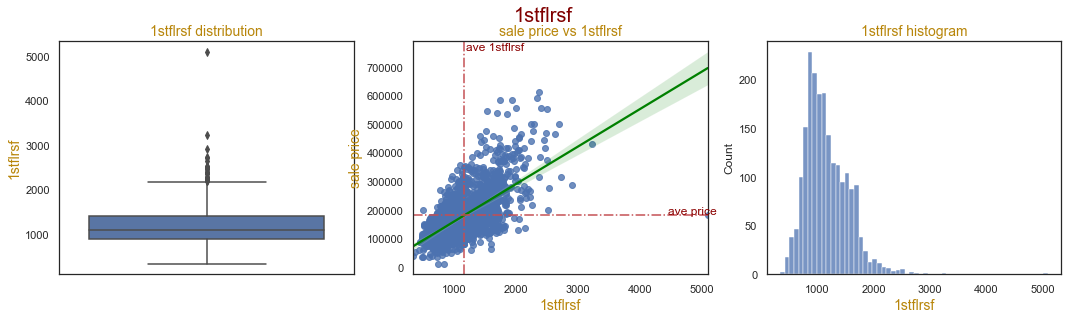

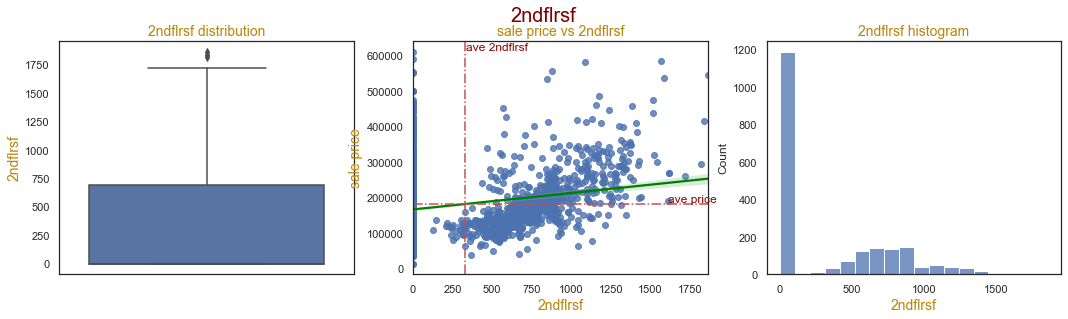

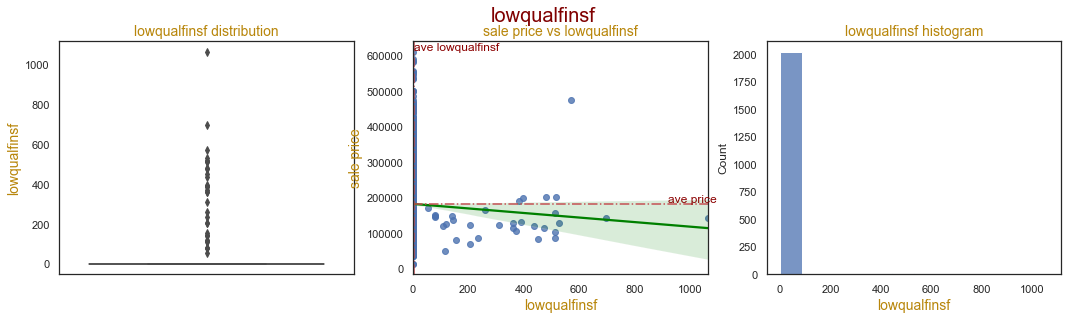

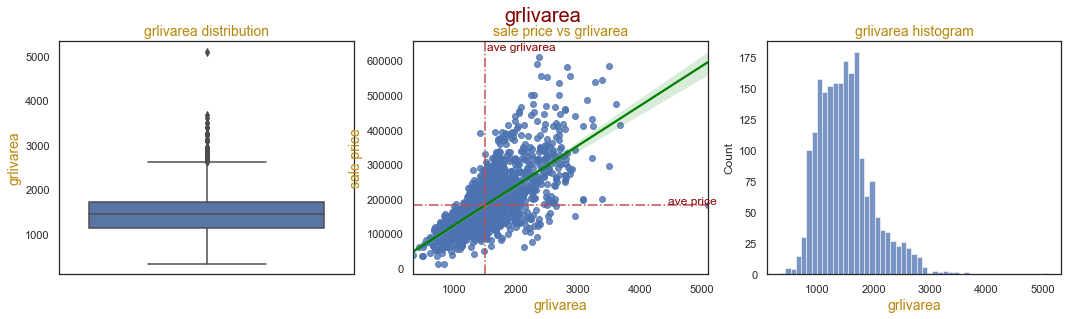

In [45]:
for col in num_col[6:14]:
    num_info(col)

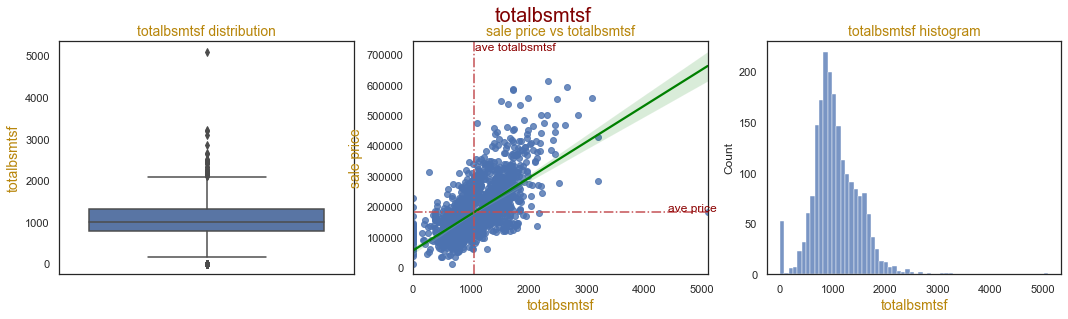

In [46]:
num_info('totalbsmtsf')

### **Conclusions (7-14):**
- **bsmt columns:** keep only the cumulative column - totalbsmtsf. notice the outlier at 5000sf which sticks out.
- **living area columns:** similarly, keep only grlivarea column. should be a very important feature for pricing homes. also has an outlier


In [47]:
#drop the basemnt outlier with more than 5000sf. just ames df.
ames.drop(ames.loc[ames['totalbsmtsf'] > 5000].index, inplace=True)
ames.drop(ames.loc[ames['grlivarea'] > 5000].index, inplace=True)

<a id = '4.3'><a/>
### 4.3 Batch 3
* [Back to top](#Content)

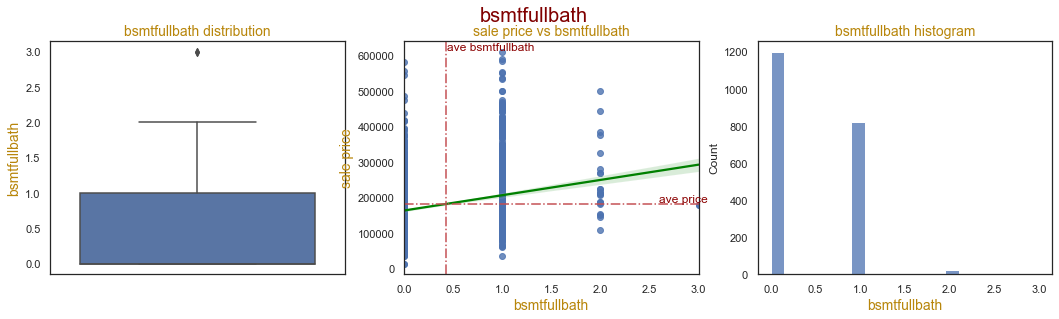

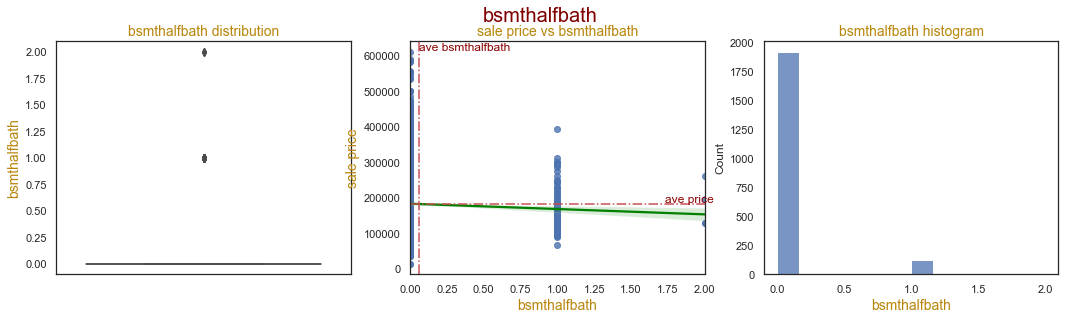

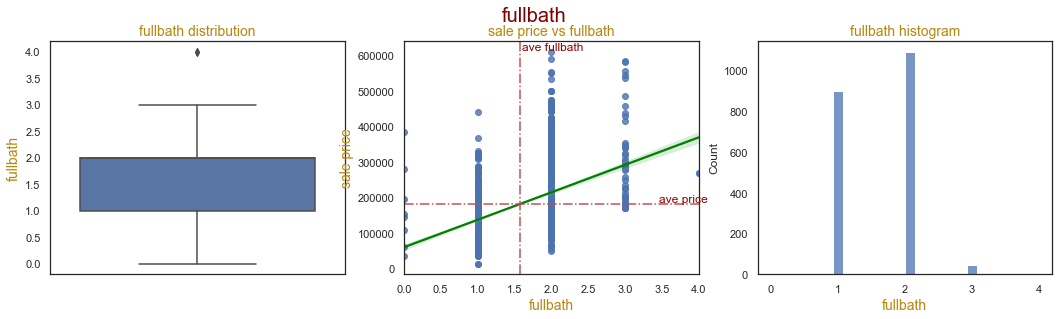

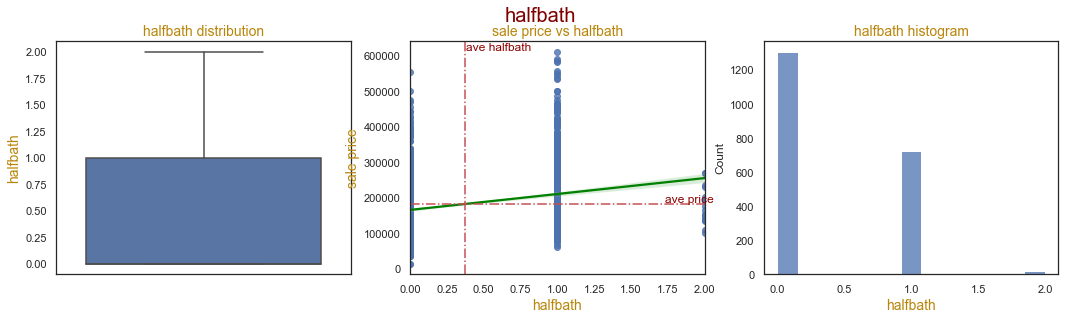

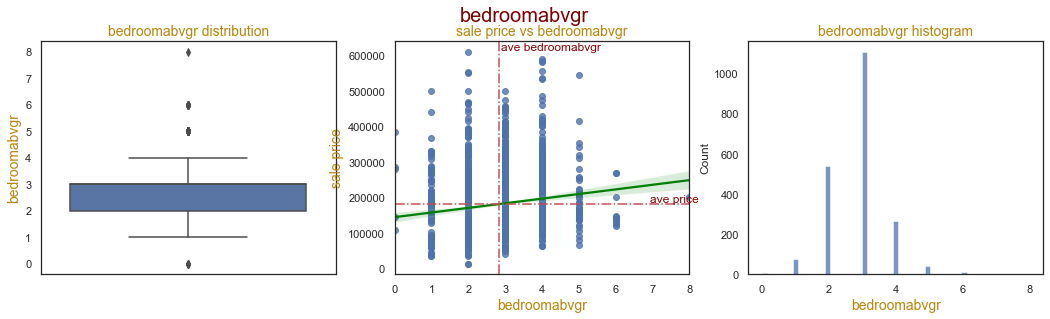

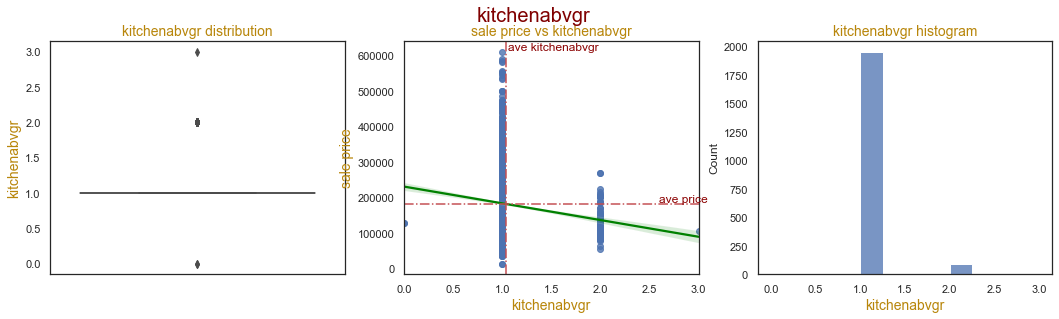

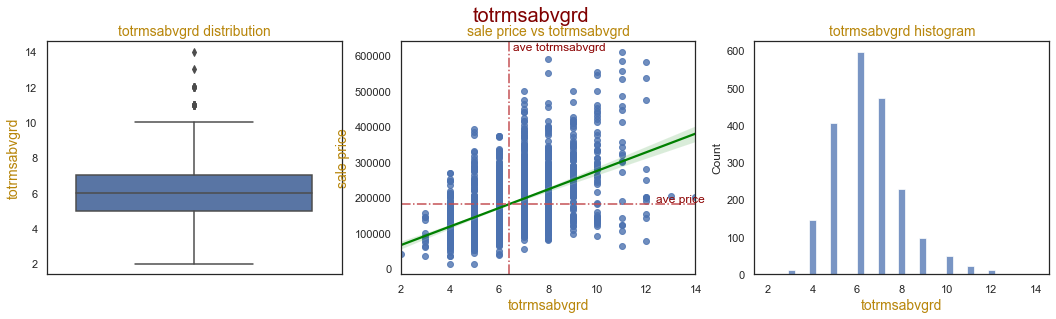

In [48]:
for col in num_col[14:21]:
    num_info(col)

### **Conclusions (15-21):**
- **bathroom columns:** add up the bathrooms. based on the plot chart however, half-bathrooms don't seem to add value. analyze further before adding
- **bedroomabvgr:** check if this column or totrmsabvgrd is better at predicting sale price. should be similar. keep one.
- **kitchenabvgr** doesn't seem to add value. check further.
- **totrmsabvgrd** see 'bedroomabvgr'

### Bathrooms:
- full bath charts look predictible - the house values increase with the number of bathrooms
- the other bath charts are not so clear - we must use groupby and mean, to figure out if the bigger number increases the house value

In [49]:
ames.groupby('bsmtfullbath')['saleprice'].mean()

bsmtfullbath
0.0    162513.948247
1.0    207051.066991
2.0    247193.772727
3.0    179000.000000
Name: saleprice, dtype: float64

In [50]:
ames.groupby('bsmthalfbath')['saleprice'].mean()

bsmthalfbath
0.0    182338.344971
1.0    165503.450000
2.0    177300.250000
Name: saleprice, dtype: float64

In [51]:
ames.groupby('halfbath')['saleprice'].mean()

halfbath
0    163544.491942
1    213639.893352
2    173912.388889
Name: saleprice, dtype: float64

- 'bsmtfullbath' and 'halfbath' look as expected after the groupby operation - the price increases with the number, except for the houses with 3 bsmtfullbath and 2 halfbath, since those are value buckets with small number of houses in them, and are victims of statistical noise
- 'bsmthalfbath' on the other hand has no discernable impact on the house value. still, we can't pick and choose only the data we like, so keep it in
- add up all the bathrooms (1 for full and 0.5 for half)

In [52]:
# divide half-bathrrooms number by 2
ames['halfbath_over2']=ames['halfbath']/2
ames['bhalfbath_over2']=ames['bsmthalfbath']/2

ames2['halfbath_over2']=ames2['halfbath']/2
ames2['bhalfbath_over2']=ames2['bsmthalfbath']/2

In [53]:
# add up all the bathrooms
ames['totnum_bath']=round(ames[['bsmtfullbath', 'fullbath','bhalfbath_over2',
                                'halfbath_over2']].sum(axis=1),2)

ames2['totnum_bath']=round(ames2[['bsmtfullbath', 'fullbath','bhalfbath_over2',
                                'halfbath_over2']].sum(axis=1),2)

In [54]:
# just a check to see if it all looks proper
display_all(ames[['bsmtfullbath', 'fullbath', 'halfbath', 'bsmthalfbath', 'totnum_bath']])
ames['totnum_bath'].value_counts()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
bsmtfullbath,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
fullbath,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0
halfbath,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
bsmthalfbath,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
totnum_bath,2.5,3.5,2.0,2.5,2.0,2.5,3.0,2.0,1.0,2.5,1.5,2.0,1.0,3.5,2.0,2.0,1.0,2.0,1.5,2.5,1.0,3.0,2.5,3.0,2.0,3.0,2.0,2.0,2.0,1.0,3.5,1.0,2.5,1.0,3.0,1.0,2.0,2.0,1.5,2.0


2.0    635
2.5    390
1.0    314
3.0    276
3.5    199
1.5    193
4.0     21
4.5     10
6.0      2
7.0      2
5.0      1
Name: totnum_bath, dtype: int64

In [55]:
# above 3.5 tot bath, the value counts are small. turn them all into 4s, (should be called 4+)
# to reduce noise
ames['tot_bath'] = np.where(ames['totnum_bath'] > 4, 4, ames['totnum_bath'])
ames2['tot_bath'] = np.where(ames2['totnum_bath'] > 4, 4, ames2['totnum_bath'])

ames['tot_bath'].value_counts()

2.0    635
2.5    390
1.0    314
3.0    276
3.5    199
1.5    193
4.0     36
Name: tot_bath, dtype: int64

In [56]:
ames.groupby('tot_bath')['saleprice'].mean()

tot_bath
1.0    111371.719745
1.5    138194.341969
2.0    158448.280315
2.5    200312.710256
3.0    231187.695652
3.5    282336.547739
4.0    280702.194444
Name: saleprice, dtype: float64

#### looks pretty good, except for the slight dip at 4+ level, which due to the small sample size

In [57]:
ames.drop(columns=['totnum_bath','bhalfbath_over2', 'halfbath_over2'], axis=1, inplace=True)
ames2.drop(columns=['totnum_bath','bhalfbath_over2', 'halfbath_over2'], axis=1, inplace=True)

In [58]:
ames['totrmsabvgrd'].corr(ames['bedroomabvgr'])

0.6633695027303294

In [59]:
ames.groupby('bedroomabvgr')['saleprice'].mean()

bedroomabvgr
0    240791.800000
1    182388.920000
2    164311.742593
3    180672.830018
4    215141.363636
5    201865.600000
6    164111.333333
8    200000.000000
Name: saleprice, dtype: float64

In [60]:
ames.groupby('totrmsabvgrd')['saleprice'].mean()

totrmsabvgrd
2      39300.000000
3      97275.000000
4     127823.158621
5     142849.600000
6     164323.639262
7     200591.474684
8     216750.539474
9     262559.214286
10    285100.081633
11    335861.380952
12    273890.500000
13    205000.000000
14    200000.000000
Name: saleprice, dtype: float64

In [61]:
# total rooms column looks better, more linear, than totalbedrooms.
# create new 12+ rooms category
ames['tot_rooms'] = np.where(ames['totrmsabvgrd'] > 11, 12, ames['totrmsabvgrd'])
ames2['tot_rooms'] = np.where(ames2['totrmsabvgrd'] > 11, 12, ames2['totrmsabvgrd'])
ames['tot_rooms'].value_counts()

6     596
7     474
5     405
8     228
4     145
9      98
10     49
11     21
12     14
3      12
2       1
Name: tot_rooms, dtype: int64

#### why do some houses have no bathrooms or bedrooms? is that an error?

In [62]:
display_all(ames[(ames['bedroomabvgr']==0)])

,191,346,743,1307,1569
mssubclass,20.00,80.000000,90.00,120.00,20.00
lotarea,20064.00,10246.000000,12900.00,4923.00,50271.00
neighborhood,3.00,1.000000,1.00,3.00,3.00
overallqual,8.00,4.000000,4.00,8.00,9.00
overallcond,6.00,9.000000,4.00,5.00,5.00
yearbuilt,1976.00,1965.000000,1969.00,2001.00,1981.00
yearremod/add,1976.00,2001.000000,1969.00,2002.00,1987.00
bsmtfinsf1,51.00,648.000000,1198.00,1153.00,1810.00
bsmtfinsf2,915.00,0.000000,0.00,0.00,0.00
bsmtunfsf,0.00,0.000000,0.00,440.00,32.00


In [63]:
# they look ok. they all seem to have no bathrooms above ground, but they all have
# basements with bathrooms and presumably, bedrooms.

<a id = '4.4'><a/>
### 4.4 Batch 4
* [Back to top](#Content)

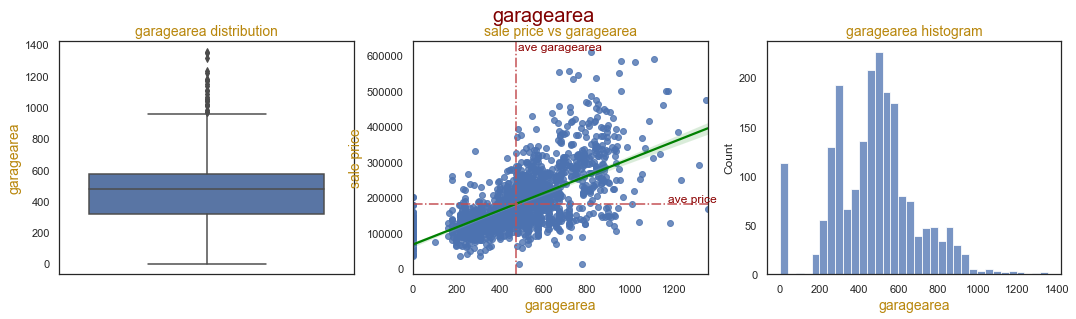

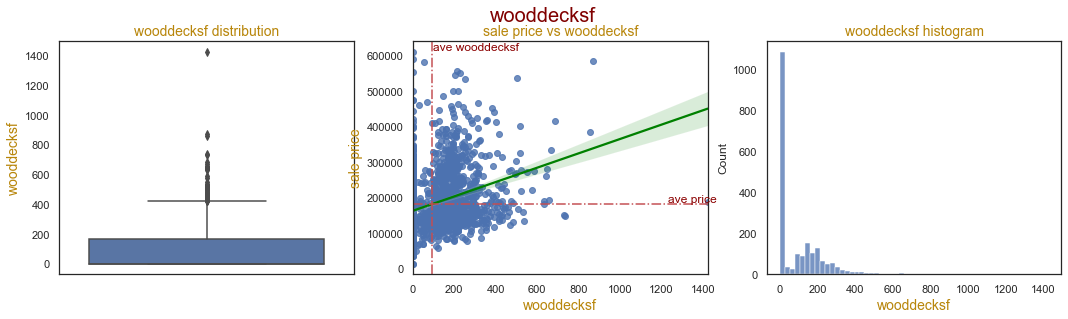

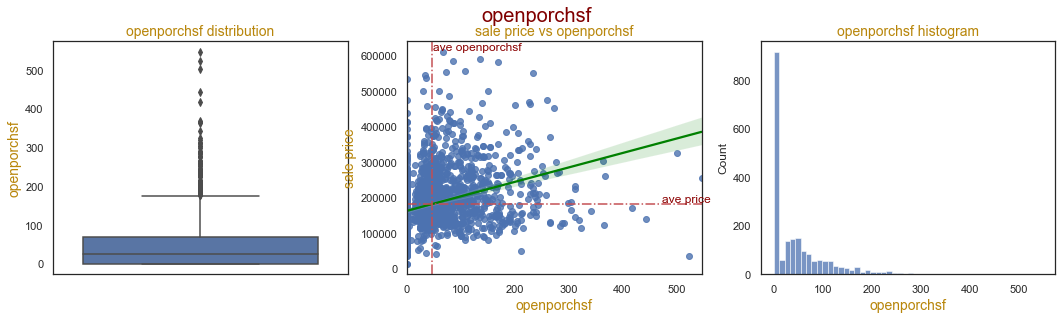

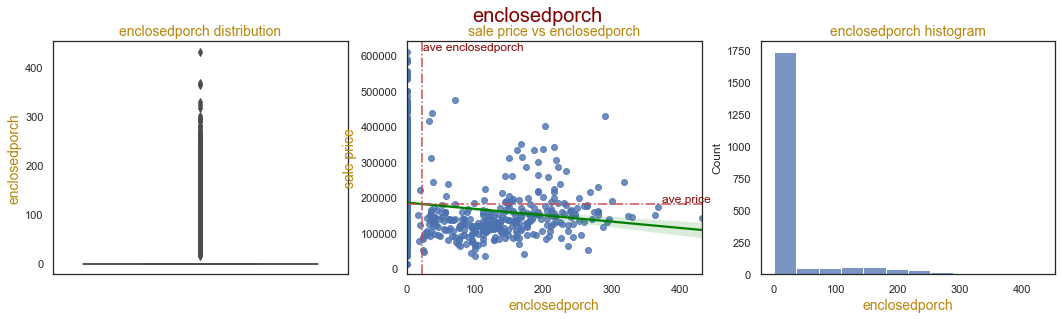

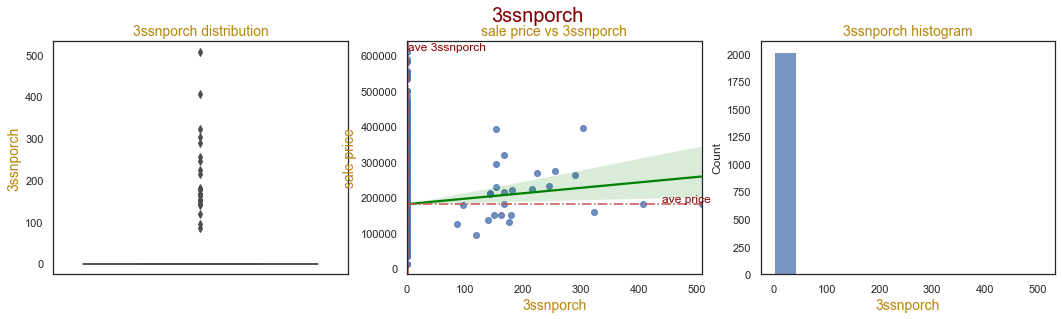

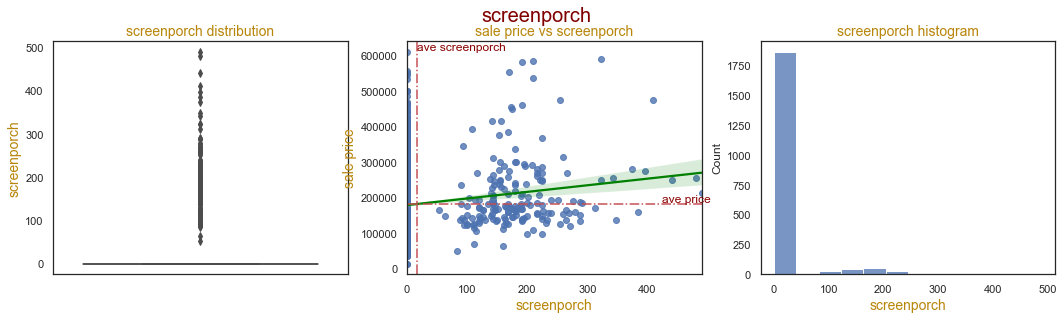

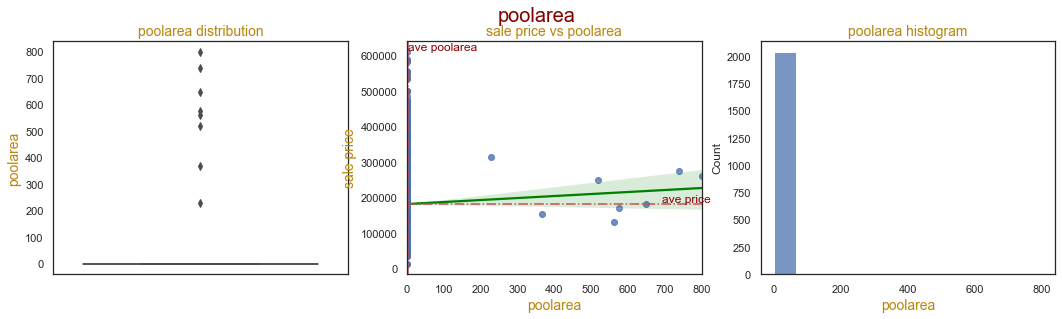

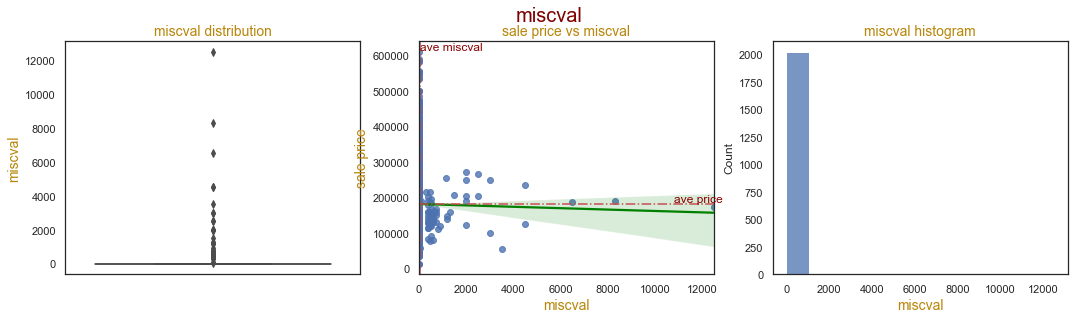

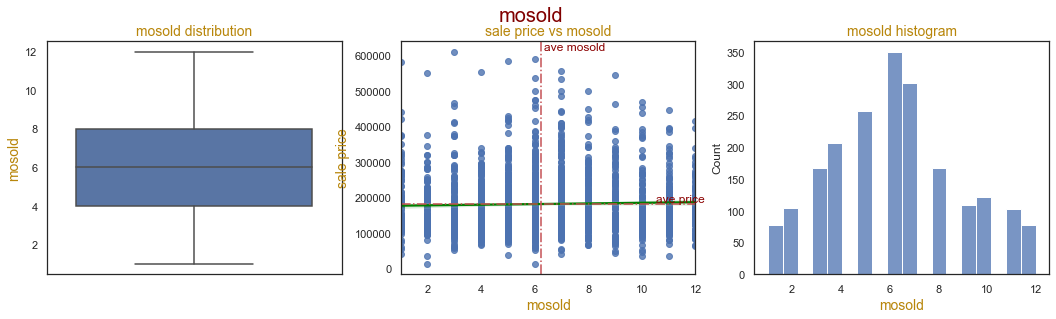

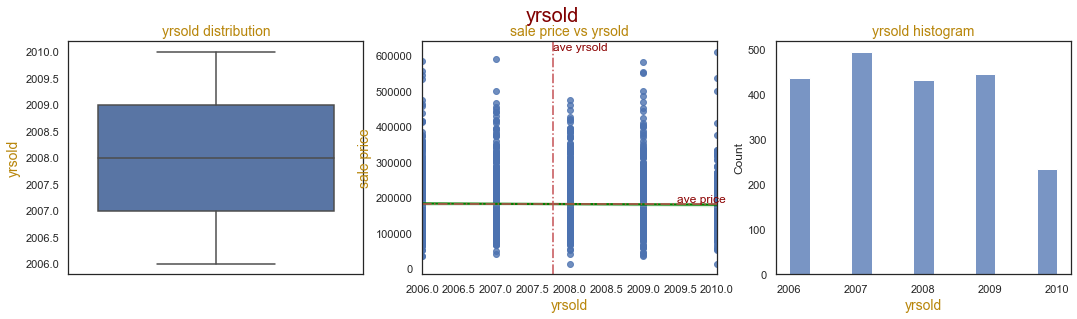

In [64]:
for col in num_col[21:31]:
    num_info(col)

### **Conclusions (22-32):**
- **garagearea:** it looks like a good predictive column, but we already had a garage column among categorical columns, so we might have to drop one of them upon correlation study
- **deck/porch columns:** most columns here have either no predictive value, or not many non-zero values. Or both. The only two worth keeping are 'openporchsf' and 'woooddecksf'. Decks and porches are sort of similar, they are both on a similar scale (after removing the one porch outlier with 1400+sf) and with similarly sloped reg lines, so it makes sense to add them up keep the number of features low.
- **poolarea** virtually all zeros. how did this columns survive till now?? drop.
- **miscval** not predictive of a price. drop.
- **mosold** groupby month and check for seasonality.
- **yrsold** real-estate prices fluctuate from year to year, especially during the financial crises. groupby, check and dummify if necessary.

In [65]:
ames['deckporcharea'] = ames['openporchsf'] + ames['wooddecksf']
ames2['deckporcharea'] = ames2['openporchsf'] + ames2['wooddecksf']

<AxesSubplot:>

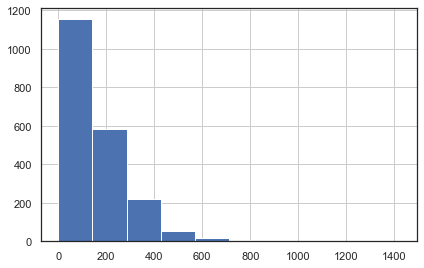

In [66]:
ames['deckporcharea'].hist()

In [67]:
# deckporch areas, together with other area columns, will need to be transformed due to their
# fat right tails

#check for montly seasonality
ames.groupby('mosold')['saleprice'].mean()

mosold
1     195576.641026
2     177626.519231
3     174767.796407
4     164311.420290
5     180332.369650
6     182052.300000
7     188253.208609
8     186927.359281
9     188990.761468
10    179297.459016
11    184377.495146
12    181192.857143
Name: saleprice, dtype: float64

In [68]:
# cursory look at housing literature and realtor anecdotal evidence says that, if there
# is any patttern at all, then January should have low prices and April some of the highest.
# The above table is all over the place.
# Conclusion: drop the month column

In [69]:
ames.groupby('yrsold')['saleprice'].mean()

yrsold
2006    179241.567506
2007    185177.022267
2008    181800.259259
2009    182455.244395
2010    174180.059829
Name: saleprice, dtype: float64

### A very tough decision on weathor to include the year column.
### Pros:
- will definitely prove to be uncorrelated to all the other columns
- there is a discernable, albeit a convoluted pattern: before the crisis of 2008 the prices were rising (up 6k from 2006 to 2007). The crisis stopped the rise, and then in 2010 with many foreclosed homes hit the market, the price dropped noticably.

### Cons:
- including year dummies would add columns, yet the range of prices isn't that high - the lowest year is 174k while the highest is 185k. That's within 6% range, or roughly 3% on each side of the mean estimate. Is that enough to justify bogging down our model with all the extra columns?


## Conclusion:
- It will definitely help in the Kaggle competition, so try to keep the year column for now.
- Work to be done later on, after the project completion: replace the dummy columns with a "year multiplier"  that can mulitply predicted price by a factor (taken from Iowa/Ames House Price data), based on the year in which it was sold, which is a much more cleaner and efficient way of including years in the model than the creation of all the extra dummy columns.


In [70]:
display_all(ames[num_col])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
mssubclass,60.0,60.0,20.0,60.0,50.0,20.0,180.0,20.0,20.0,60.0,160.0,20.0,70.0,160.0,20.0,20.0,70.0,20.0,20.0,60.0,20.0,120.0,60.0,20.0,190.0,20.0,20.0,50.0,190.0,50.0,20.0,70.0,120.0,20.0,20.0,20.0,160.0,20.0,20.0,20.0
lotarea,13517.0,11492.0,7922.0,9802.0,14235.0,16492.0,3675.0,12160.0,15783.0,11606.0,1680.0,7488.0,26400.0,2645.0,9627.0,10114.0,4571.0,8816.0,8197.0,8640.0,8724.0,5664.0,12867.0,7980.0,34650.0,10573.0,8450.0,11700.0,8250.0,8064.0,9600.0,11435.0,9549.0,10950.0,10637.0,9000.0,2665.0,11751.0,9600.0,8428.0
overallqual,6.0,7.0,5.0,5.0,6.0,6.0,6.0,5.0,5.0,5.0,6.0,7.0,5.0,8.0,7.0,5.0,5.0,5.0,6.0,7.0,5.0,8.0,8.0,6.0,5.0,6.0,5.0,5.0,5.0,5.0,8.0,8.0,8.0,6.0,8.0,6.0,5.0,6.0,7.0,5.0
overallcond,8.0,5.0,7.0,5.0,8.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,7.0,5.0,5.0,5.0,5.0,6.0,5.0,5.0,5.0,5.0,5.0,7.0,5.0,6.0,8.0,6.0,6.0,7.0,5.0,7.0,5.0,6.0,5.0,6.0,6.0,6.0,6.0,7.0
yearbuilt,1976.0,1996.0,1953.0,2006.0,1900.0,1966.0,2005.0,1959.0,1952.0,1969.0,1971.0,2005.0,1880.0,1999.0,2007.0,2004.0,1916.0,1963.0,1977.0,2009.0,1968.0,2000.0,2005.0,1992.0,1955.0,1961.0,1965.0,1937.0,1895.0,1949.0,1981.0,1929.0,1995.0,1952.0,2007.0,1958.0,1977.0,1977.0,1973.0,1994.0
yearremod/add,2005.0,1997.0,2007.0,2007.0,1993.0,2002.0,2006.0,1959.0,1952.0,1969.0,1971.0,2005.0,2007.0,2000.0,2007.0,2005.0,1950.0,1963.0,1977.0,2009.0,1968.0,2000.0,2006.0,2007.0,1955.0,1961.0,2009.0,1995.0,2006.0,2006.0,1981.0,1950.0,1996.0,1952.0,2008.0,1958.0,1977.0,1977.0,1973.0,1994.0
bsmtfinsf1,533.0,637.0,731.0,0.0,0.0,247.0,547.0,1000.0,292.0,650.0,387.0,393.0,0.0,813.0,24.0,0.0,0.0,651.0,0.0,24.0,492.0,1158.0,0.0,935.0,1056.0,1312.0,553.0,606.0,0.0,0.0,1104.0,0.0,437.0,441.0,1288.0,0.0,548.0,705.0,916.0,420.0
bsmtfinsf2,0.0,0.0,0.0,0.0,0.0,713.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,1057.0,0.0,0.0,0.0,173.0,0.0,0.0,0.0
bsmtunfsf,192.0,276.0,326.0,384.0,676.0,557.0,0.0,188.0,632.0,390.0,96.0,815.0,0.0,147.0,1327.0,1430.0,624.0,470.0,660.0,732.0,402.0,343.0,1209.0,233.0,0.0,141.0,224.0,336.0,957.0,672.0,1420.0,792.0,0.0,507.0,417.0,160.0,36.0,1139.0,326.0,570.0
totalbsmtsf,725.0,913.0,1057.0,384.0,676.0,1517.0,547.0,1188.0,924.0,1040.0,483.0,1208.0,0.0,960.0,1351.0,1430.0,624.0,1121.0,660.0,756.0,894.0,1501.0,1209.0,1168.0,1056.0,1453.0,894.0,942.0,957.0,672.0,2524.0,792.0,1494.0,948.0,1705.0,160.0,757.0,1844.0,1242.0,990.0


<a id = '5.0'><a/>
### 5.0 Final cleanup
* [Back to top](#Content)

In [71]:
# drop all the columns that were assigned so:
ames.drop(columns=['mssubclass', 'yearbuilt', 'yearremod/add', 'bsmtfinsf1', 'bsmtfinsf2',
                   'bsmtunfsf', '1stflrsf', '2ndflrsf', 'lowqualfinsf','bsmtfullbath',
                   'bsmthalfbath', 'fullbath', 'halfbath','bedroomabvgr', 'kitchenabvgr',
                  'totrmsabvgrd', 'wooddecksf', 'openporchsf', 'enclosedporch', '3ssnporch',
                  'screenporch', 'poolarea', 'miscval', 'mosold'], axis=1, inplace=True)

ames2.drop(columns=['mssubclass', 'yearbuilt', 'yearremod/add', 'bsmtfinsf1', 'bsmtfinsf2',
                   'bsmtunfsf', '1stflrsf', '2ndflrsf', 'lowqualfinsf','bsmtfullbath',
                   'bsmthalfbath', 'fullbath', 'halfbath','bedroomabvgr', 'kitchenabvgr',
                  'totrmsabvgrd', 'wooddecksf', 'openporchsf', 'enclosedporch', '3ssnporch',
                  'screenporch', 'poolarea', 'miscval', 'mosold'], axis=1, inplace=True)

In [72]:
print(ames.shape)
ames2.shape


(2043, 32)


(878, 32)

In [73]:
# the same number of columns is correct. ames2 has the 'id' columns but not the 'saleprice'
display_all(ames)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
lotarea,13517.000000,11492.00,7922.00,9802.0,14235.00,16492.00,3675.00,12160.000000,15783.000000,11606.00,1680.00,7488.00,26400.00,2645.0,9627.00,10114.00,4571.00,8816.0,8197.00,8640.00,8724.00,5664.00,12867.00,7980.00000,34650.00,10573.00,8450.00,11700.000000,8250.00,8064.0,9600.00,11435.000000,9549.00,10950.0,10637.00,9000.00,2665.00,11751.00,9600.00,8428.00
neighborhood,1.000000,3.00,1.00,3.0,3.00,1.00,3.00,1.000000,1.000000,1.00,1.00,1.00,3.00,3.0,1.00,1.00,1.00,1.0,1.00,3.00,1.00,3.00,3.00,2.00000,2.00,1.00,1.00,2.000000,2.00,1.0,2.00,2.000000,3.00,1.0,1.00,1.00,1.00,2.00,2.00,1.00
overallqual,6.000000,7.00,5.00,5.0,6.00,6.00,6.00,5.000000,5.000000,5.00,6.00,7.00,5.00,8.0,7.00,5.00,5.00,5.0,6.00,7.00,5.00,8.00,8.00,6.00000,5.00,6.00,5.00,5.000000,5.00,5.0,8.00,8.000000,8.00,6.0,8.00,6.00,5.00,6.00,7.00,5.00
overallcond,8.000000,5.00,7.00,5.0,8.00,6.00,5.00,5.000000,5.000000,5.00,5.00,5.00,7.00,5.0,5.00,5.00,5.00,6.0,5.00,5.00,5.00,5.00,5.00,7.00000,5.00,6.00,8.00,6.000000,6.00,7.0,5.00,7.000000,5.00,6.0,5.00,6.00,6.00,6.00,6.00,7.00
totalbsmtsf,725.000000,913.00,1057.00,384.0,676.00,1517.00,547.00,1188.000000,924.000000,1040.00,483.00,1208.00,0.00,960.0,1351.00,1430.00,624.00,1121.0,660.00,756.00,894.00,1501.00,1209.00,1168.00000,1056.00,1453.00,894.00,942.000000,957.00,672.0,2524.00,792.000000,1494.00,948.0,1705.00,160.00,757.00,1844.00,1242.00,990.00
grlivarea,1479.000000,2122.00,1057.00,1444.0,1445.00,1888.00,1072.00,1188.000000,924.000000,2080.00,987.00,1208.00,2016.00,1607.0,1361.00,1430.00,1344.00,1121.0,1285.00,1547.00,894.00,1659.00,2253.00,1187.00000,1056.00,1453.00,894.00,1938.000000,1991.00,924.0,2524.00,1517.000000,1494.00,948.0,1718.00,1142.00,1475.00,1844.00,1242.00,990.00
kitchenqual,2.000000,2.00,2.00,1.0,1.00,2.00,1.00,1.000000,1.000000,0.00,1.00,2.00,1.00,2.0,2.00,2.00,1.00,1.0,1.00,2.00,1.00,3.00,3.00,1.00000,1.00,1.00,1.00,2.000000,1.00,1.0,2.00,2.000000,3.00,1.0,2.00,1.00,1.00,1.00,1.00,1.00
garagearea,475.000000,559.00,246.00,400.0,484.00,578.00,525.00,531.000000,420.000000,504.00,264.00,632.00,576.00,480.0,610.00,624.00,513.00,480.0,528.00,614.00,450.00,499.00,575.00,420.00000,572.00,530.00,336.00,240.000000,0.00,576.0,542.00,400.000000,481.00,410.0,826.00,384.00,336.00,546.00,528.00,384.00
paveddrive,1.000000,1.00,1.00,1.0,0.00,1.00,1.00,1.000000,1.000000,1.00,1.00,1.00,0.00,1.0,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00000,1.00,1.00,1.00,1.000000,0.00,1.0,1.00,1.000000,1.00,0.0,1.00,1.00,1.00,1.00,1.00,1.00
yrsold,2010.000000,2009.00,2010.00,2010.0,2010.00,2010.00,2006.00,2010.000000,2007.000000,2007.00,2008.00,2006.00,2009.00,2008.0,2008.00,2010.00,2008.00,2009.0,2007.00,2010.00,2007.00,2009.00,2006.00,2010.00000,2006.00,2009.00,2010.00,2008.000000,2007.00,2007.0,2009.00,2006.000000,2006.00,2007.0,2009.00,2009.00,2006.00,2010.00,2007.00,2007.00


<a id = '6.0'><a/>
### 6.0 Predicted variable
* [Back to top](#Content)

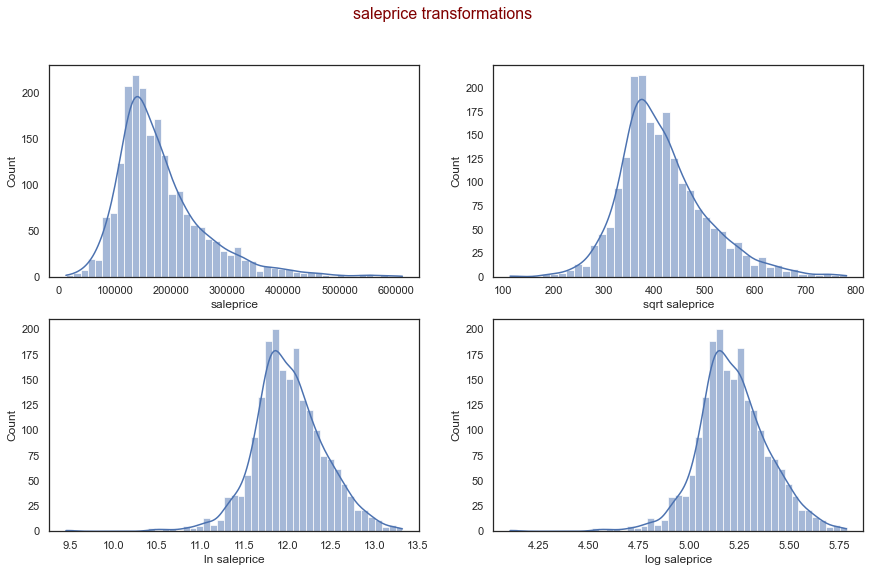

In [74]:
fig, ax = plt.subplots(2,2, figsize=(13,8))
ax = ax.ravel()
sns.histplot(ames['saleprice'], kde=True, ax=ax[0])
sns.histplot(np.sqrt(ames['saleprice']), kde=True, ax=ax[1])
ax[1].set_xlabel('sqrt saleprice')
sns.histplot(np.log(ames['saleprice']), kde=True, ax=ax[2])
ax[2].set_xlabel('ln saleprice')
sns.histplot(np.log10(ames['saleprice']), kde=True, ax=ax[3])
ax[3].set_xlabel('log saleprice')
fig.suptitle('saleprice transformations', size=16, color='maroon')
plt.show()

#### as literature on the subject predicts, houses sale prices distribution has a long right tail. transformation needs to be done, and the natural log one seems the best.

#### that however raises more questions than it answers. The key one is: what  do we do now with some key independent variables such as living area and lot area?
#### Commonly, house prices are quoted in dollars per square foot (of either the lot or the living area). Now that are prices are actually ln(prices) this yardstick is thrown out of whack. In other words, we would be estimating prices based on the natural log of dollars per square foot, which is ridiculous. 

#### to resolve the issue, lets see the effects of the price transformation on some charts and correletions, and then, if need be, transform the features that are measured in sq feet by taking their natural logs as well. That way, the metric of "price per square foot" will be meaningful again, and our model will be more intuitive.

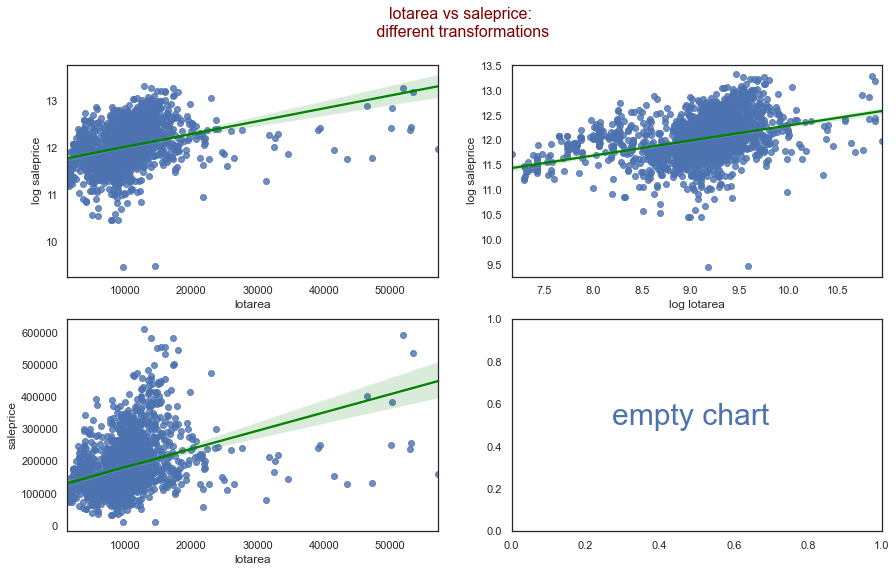

In [75]:
#plot 3 regresssion charts of price vs square footage.

fig, ax = plt.subplots(2,2, figsize=(13,8))
ax = ax.ravel()

#price per square foot
sns.regplot(data=ames, x='lotarea', y='saleprice', ax=ax[2], line_kws={"color": "green"})

# logprice per square foot
y = np.log(ames['saleprice'])
sns.regplot(x=ames['lotarea'], y=y, ax=ax[0], line_kws={"color": "green"})
ax[0].set_ylabel('log saleprice')

# logprice per logsquare foot
x = np.log(ames['lotarea'])
sns.regplot(x=x, y=y, ax=ax[1], line_kws={"color": "green"})
ax[1].set_ylabel('log saleprice')
ax[1].set_xlabel('log lotarea')

ax[3].text(0.27, 0.5 ,'empty chart', fontsize=30, c='b')

fig.suptitle('lotarea vs saleprice:\n different transformations', size=16, color='maroon')
plt.show()

# sns.regplot(data=ames, x='lotarea', y='saleprice', ax=ax[3])


In [76]:
print(f'corr of log(lotarea) vs log(saleprice) is {x.corr(y):.3f}')
print(f'corr of lotarea vs saleprice is {ames["lotarea"].corr(ames["saleprice"]):.3f}')
print(f'corr of lotarea vs log(saleprice) is {ames["lotarea"].corr(y):.3f}')

corr of log(lotarea) vs log(saleprice) is 0.359
corr of lotarea vs saleprice is 0.357
corr of lotarea vs log(saleprice) is 0.333


In [77]:
x1 = np.log(ames['grlivarea'])
print(f'corr of log(grlivarea) vs log(saleprice) is {x1.corr(y):.3f}')
print(f'corr of grlivarea vs saleprice is {ames["grlivarea"].corr(ames["saleprice"]):.3f}')
print(f'corr of grlivarea vs log(saleprice) is {ames["grlivarea"].corr(y):.3f}')

corr of log(grlivarea) vs log(saleprice) is 0.727
corr of grlivarea vs saleprice is 0.721
corr of grlivarea vs log(saleprice) is 0.710


### Conslusion: both the chart and the correlation number imply that log transformation of the area features - lotarea and grlivarea - along with the saleprice gives better results.

In [78]:
#log transform the area variables. 
#add a scomall constant to garage and porchdeck area since they contain 0 values which 
#cannot be taken a log off. Use the constant value of 1, since the erstwhile 0 values will
# stay 0 since log(0+1)=log(1)=0

In [79]:
ames['saleprice'] = np.log(ames['saleprice'])
ames['lotarea'] = np.log(ames['lotarea'])
ames['grlivarea'] = np.log(ames['grlivarea'])
ames['garagearea'] = np.log(ames['garagearea'] +1)
ames['deckporcharea'] = np.log(ames['deckporcharea']+1)
ames['totalbsmtsf'] = np.log(ames['totalbsmtsf']+1)

ames2['grlivarea'] = np.log(ames2['grlivarea'])
ames2['lotarea'] = np.log(ames2['lotarea'])
ames2['garagearea'] = np.log(ames2['garagearea'] +1)
ames2['deckporcharea'] = np.log(ames2['deckporcharea']+1)
ames2['totalbsmtsf'] = np.log(ames2['totalbsmtsf']+1)

In [80]:
ames.describe().T

,count,mean,std,min,25%,50%,75%,max
lotarea,2043.0,9.086685,0.488133,7.170120,8.922658,9.148465,9.349754,10.954309
neighborhood,2043.0,1.835047,0.885018,1.000000,1.000000,2.000000,3.000000,3.000000
overallqual,2043.0,6.109643,1.422404,1.000000,5.000000,6.000000,7.000000,10.000000
overallcond,2043.0,5.560940,1.104962,1.000000,5.000000,5.000000,6.000000,9.000000
totalbsmtsf,2043.0,6.740402,1.161033,0.000000,6.677083,6.902743,7.182352,8.073091
grlivarea,2043.0,7.258849,0.318583,5.811141,7.028201,7.273786,7.454720,8.208492
kitchenqual,2043.0,1.514440,0.664005,0.000000,1.000000,1.000000,2.000000,3.000000
garagearea,2043.0,5.807237,1.453681,0.000000,5.768321,6.175867,6.357842,7.213032
paveddrive,2043.0,0.907000,0.290504,0.000000,1.000000,1.000000,1.000000,1.000000
yrsold,2043.0,2007.777778,1.313516,2006.000000,2007.000000,2008.000000,2009.000000,2010.000000


In [81]:
print('train shape:', ames.shape)
print('test shape:', ames2.shape)

train shape: (2043, 32)
test shape: (878, 32)


<a id = '7.0'><a/>
### 7.0 Correlation and final drops
* [Back to top](#Content)

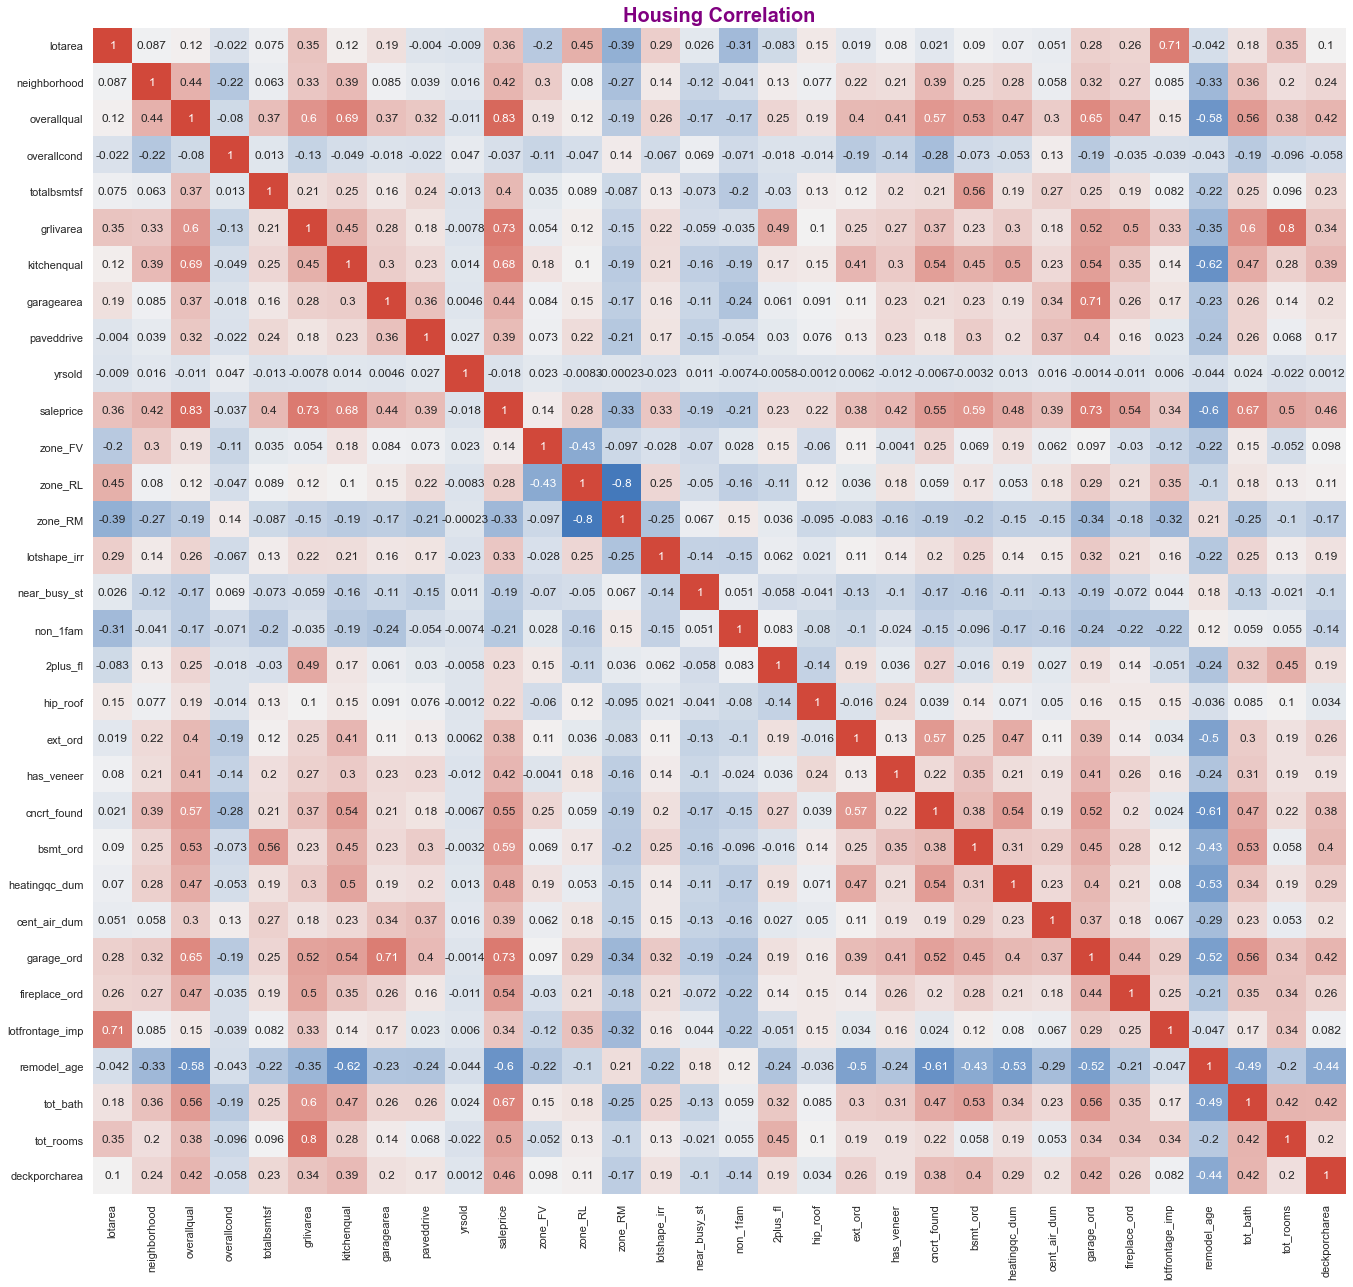

In [82]:
plt.figure(figsize = (20,20))

# mask = np.zeros_like(USA2019q.corr())
# mask[np.triu_indices_from(mask)] = True
colorshm = sns.diverging_palette(250, 15, as_cmap=True)
sns.heatmap(ames.corr(), cmap= colorshm, annot=True, cbar=False) # linewidths = 0.5)
plt.title("Housing Correlation", fontsize=20, color='purple', weight = 'heavy')
plt.show()

- grlivearea and tot_rooms are highly correlated (0.8). keep grlivearea since its correlation with saleprice is higher (0.73 vs 0.5)
- lotfrontage is highly correlated with lotarea (0.71). Part of the reason for such high correlation is the fact that we imputed null values in lotfrontage based on lotarea. Therefore we will keep lotfrontage.
- garagearea is highly correlated with garage_ord (0.71). keep garage_ord as its correlation with saleprice is higher (0.73 vs 0.44)

In [83]:
# drop columns as concluded during the heatmap analysis
ames.drop(columns=['tot_rooms', 'garagearea'], axis=1, inplace=True)
ames2.drop(columns=['tot_rooms', 'garagearea'], axis=1, inplace=True)

In [84]:
ames.shape

(2043, 30)

In [85]:
ames2.shape

(878, 30)

In [86]:
# the target number of columns was 30 or below. save & move on to regression
ames.to_csv('../datasets/train_cat&num_clean.csv', index=False)
ames2.to_csv('../datasets/test_cat&num_clean.csv', index=False)